# Importing Libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing Data

In [2]:
df = pd.read_csv(r"C:/Users\KALYAN\Desktop\6. Mini Project\AirBNB.csv")

# Data Exploration

In [3]:
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [4]:
df.shape

(74111, 29)

In [5]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [8]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [9]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [10]:
df["zipcode"].unique

<bound method Series.unique of 0          11201
1          10019
2          10027
3        94117.0
4          20009
          ...   
74106    11206.0
74107      90254
74108    11206.0
74109      10011
74110      90802
Name: zipcode, Length: 74111, dtype: object>

In [11]:
index= ["host_response_rate","property_type", "room_type","accommodates","bathrooms","bed_type", "cancellation_policy", "cleaning_fee",
       "city","instant_bookable", "beds", "bedrooms", "neighbourhood","first_review", "last_review","zipcode",
       "name","host_since","thumbnail_url", "latitude", "longitude", 
        "host_has_profile_pic", "host_identity_verified"]

for i in index:
    
    print(df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")

100%    43254
90%      2277
80%      1113
0%        883
50%       611
        ...  
39%         1
15%         1
31%         1
21%         1
6%          1
Name: host_response_rate, Length: 80, dtype: int64 

---------------------------------------------------------------
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
C

# Data Pre-processing

# Handling Missing Values  

In [12]:
for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))


bathrooms :- 200,  dtypes : float64

first_review :- 15864,  dtypes : object

host_has_profile_pic :- 188,  dtypes : object

host_identity_verified :- 188,  dtypes : object

host_response_rate :- 18299,  dtypes : object

host_since :- 188,  dtypes : object

last_review :- 15827,  dtypes : object

neighbourhood :- 6872,  dtypes : object

review_scores_rating :- 16722,  dtypes : float64

thumbnail_url :- 8216,  dtypes : object

zipcode :- 966,  dtypes : object

bedrooms :- 91,  dtypes : float64

beds :- 131,  dtypes : float64


Last Review

In [13]:
df.last_review.fillna(method="ffill",inplace=True)

First Review

In [14]:
df.first_review.fillna(method="ffill",inplace=True)

Host Since

In [15]:
df.host_since.fillna(method="ffill",inplace=True)

Bathrooms

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

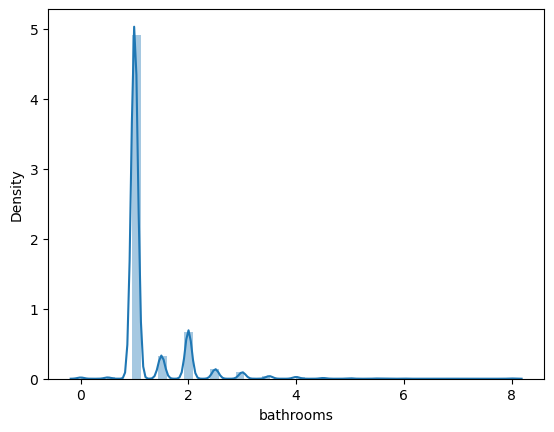

In [16]:
sns.distplot(df["bathrooms"])

In [17]:
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))

Review_Scores_Rating

<AxesSubplot:xlabel='review_scores_rating', ylabel='Density'>

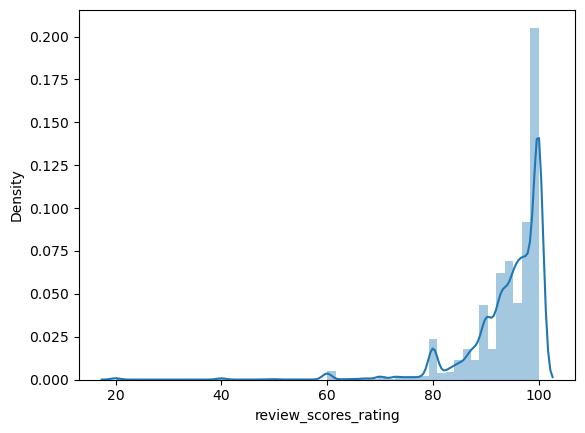

In [18]:
sns.distplot(df["review_scores_rating"])

In [19]:
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)

Bedrooms

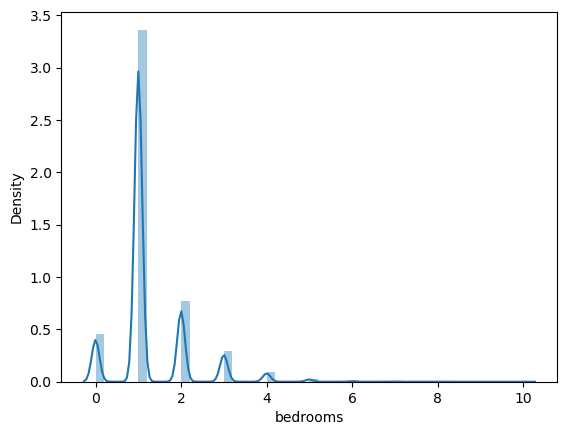

In [20]:
sns.distplot(df["bedrooms"])
plt.show()

In [21]:
df["bedrooms"] = df['bedrooms'].fillna((df["bathrooms"].median()))

Beds

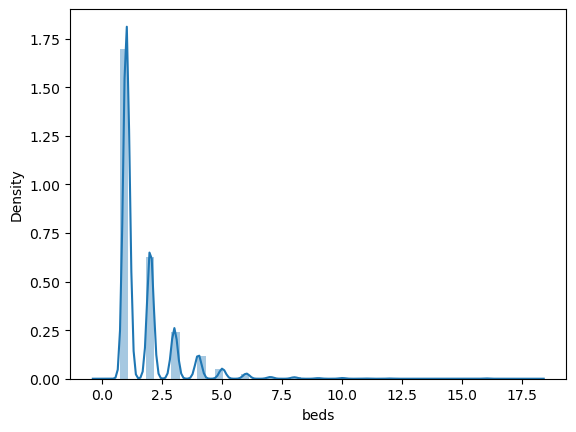

In [22]:
sns.distplot(df["beds"])
plt.show()

In [23]:
df["beds"] = df["beds"].fillna((df["bathrooms"].median()))

Amenties

In [24]:
amenities_count = []
for i in df["amenities"]:
    amenities_count.append(len(i))
    
df["amenities"] = amenities_count

# Data Visualisation

In [25]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)
    
# Function to plot catplot graphs
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

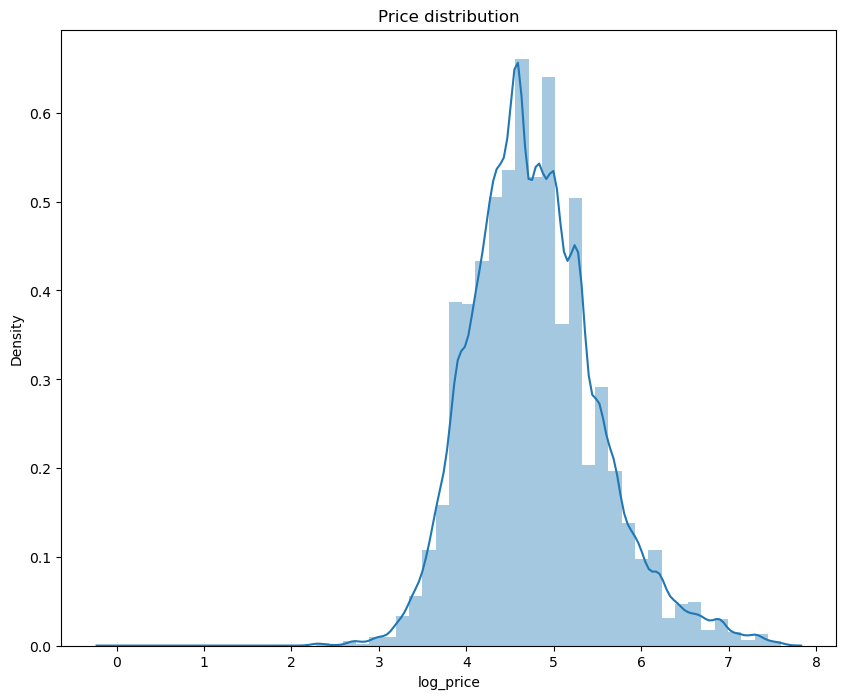

In [26]:
plt.figure(figsize = (10, 8))
sns.distplot(df["log_price"])
plt.title('Price distribution')
plt.show()

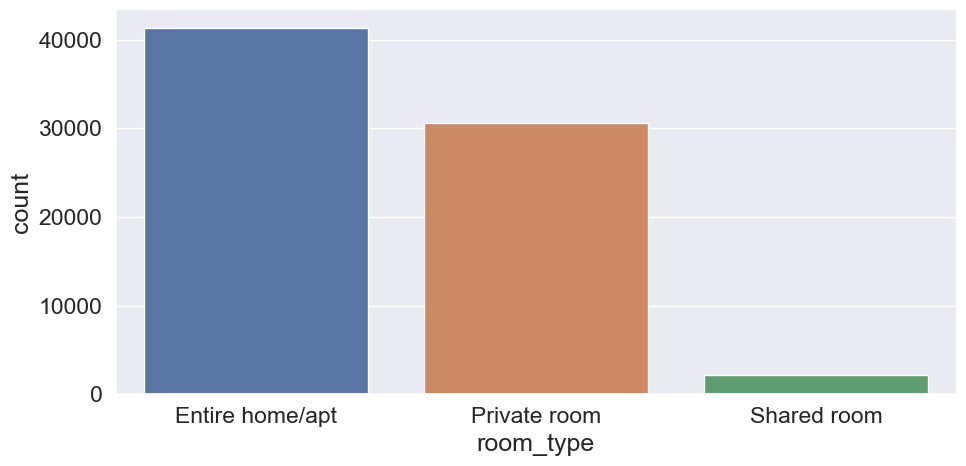

In [27]:
plot_catplot("room_type", "count", 5, 2)

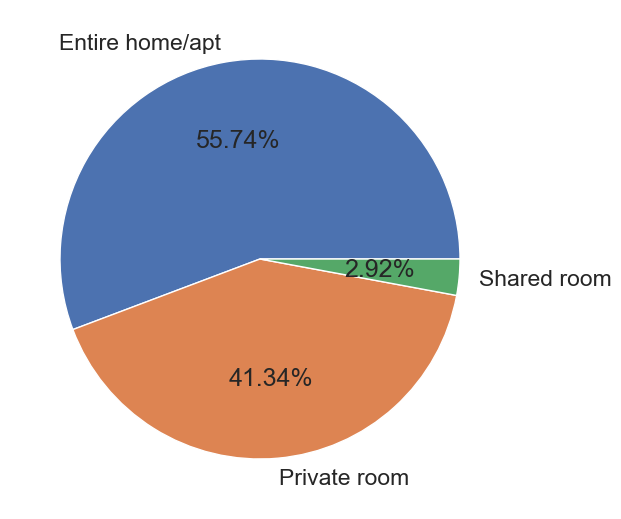

In [28]:
plot_piechart("room_type") 

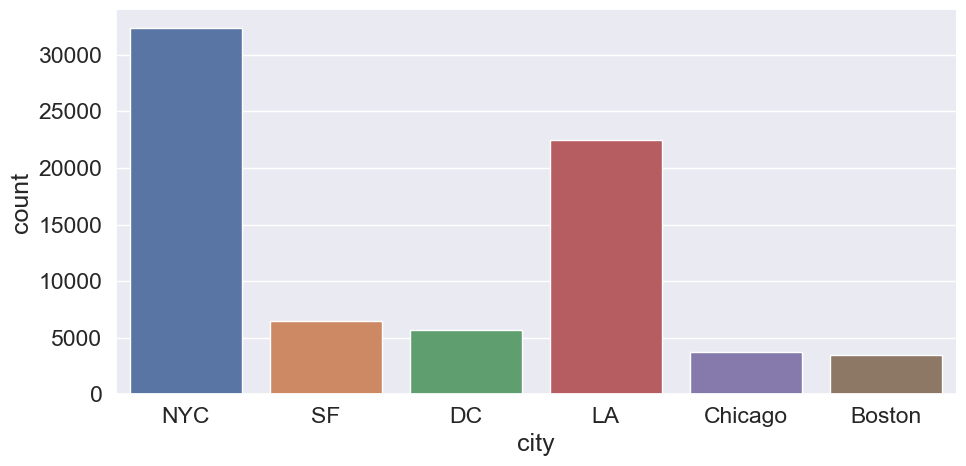

In [29]:
plot_catplot("city","count", 5, 2)

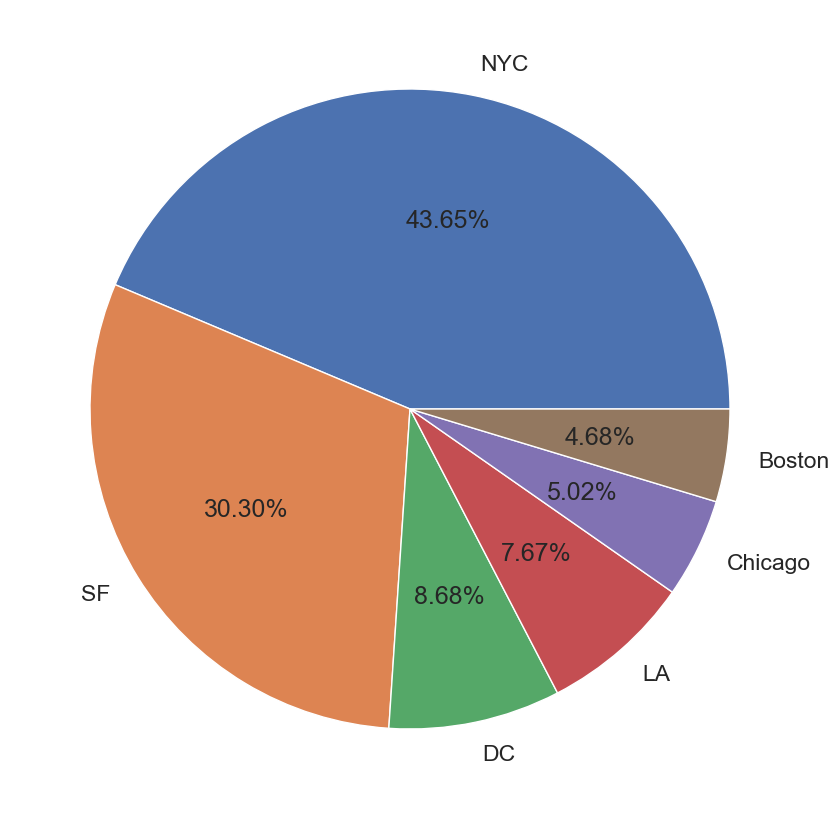

In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

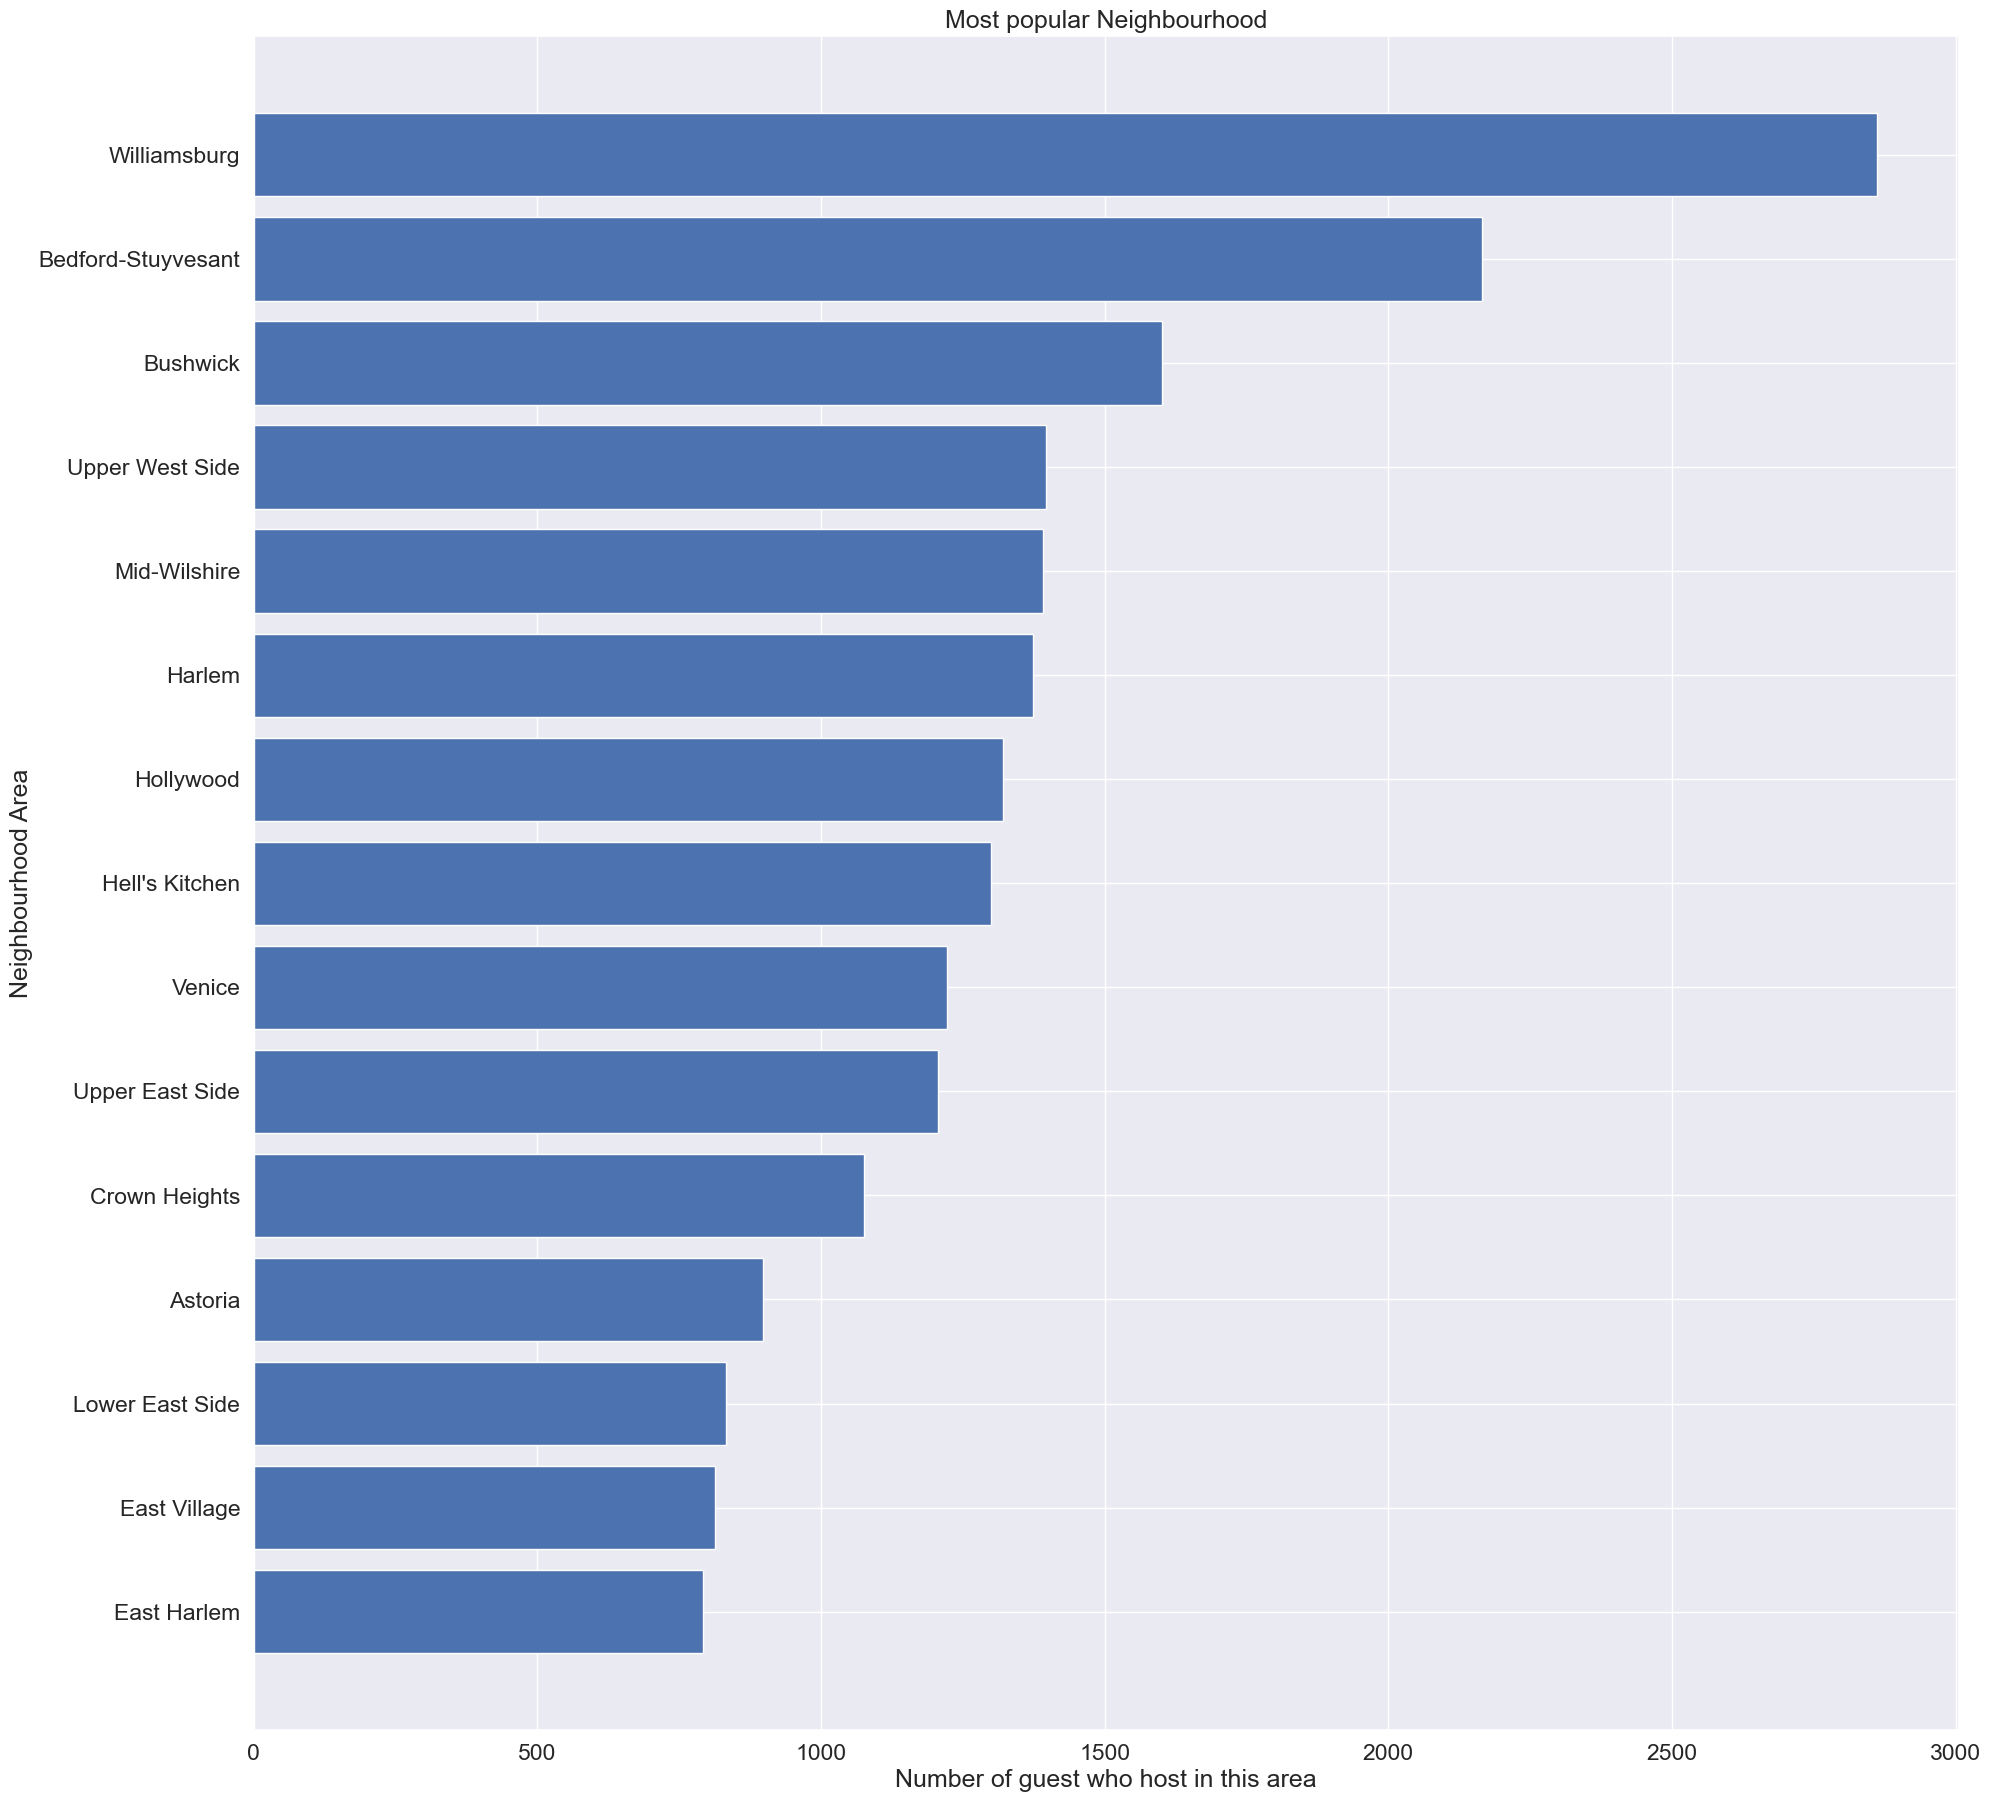

In [31]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

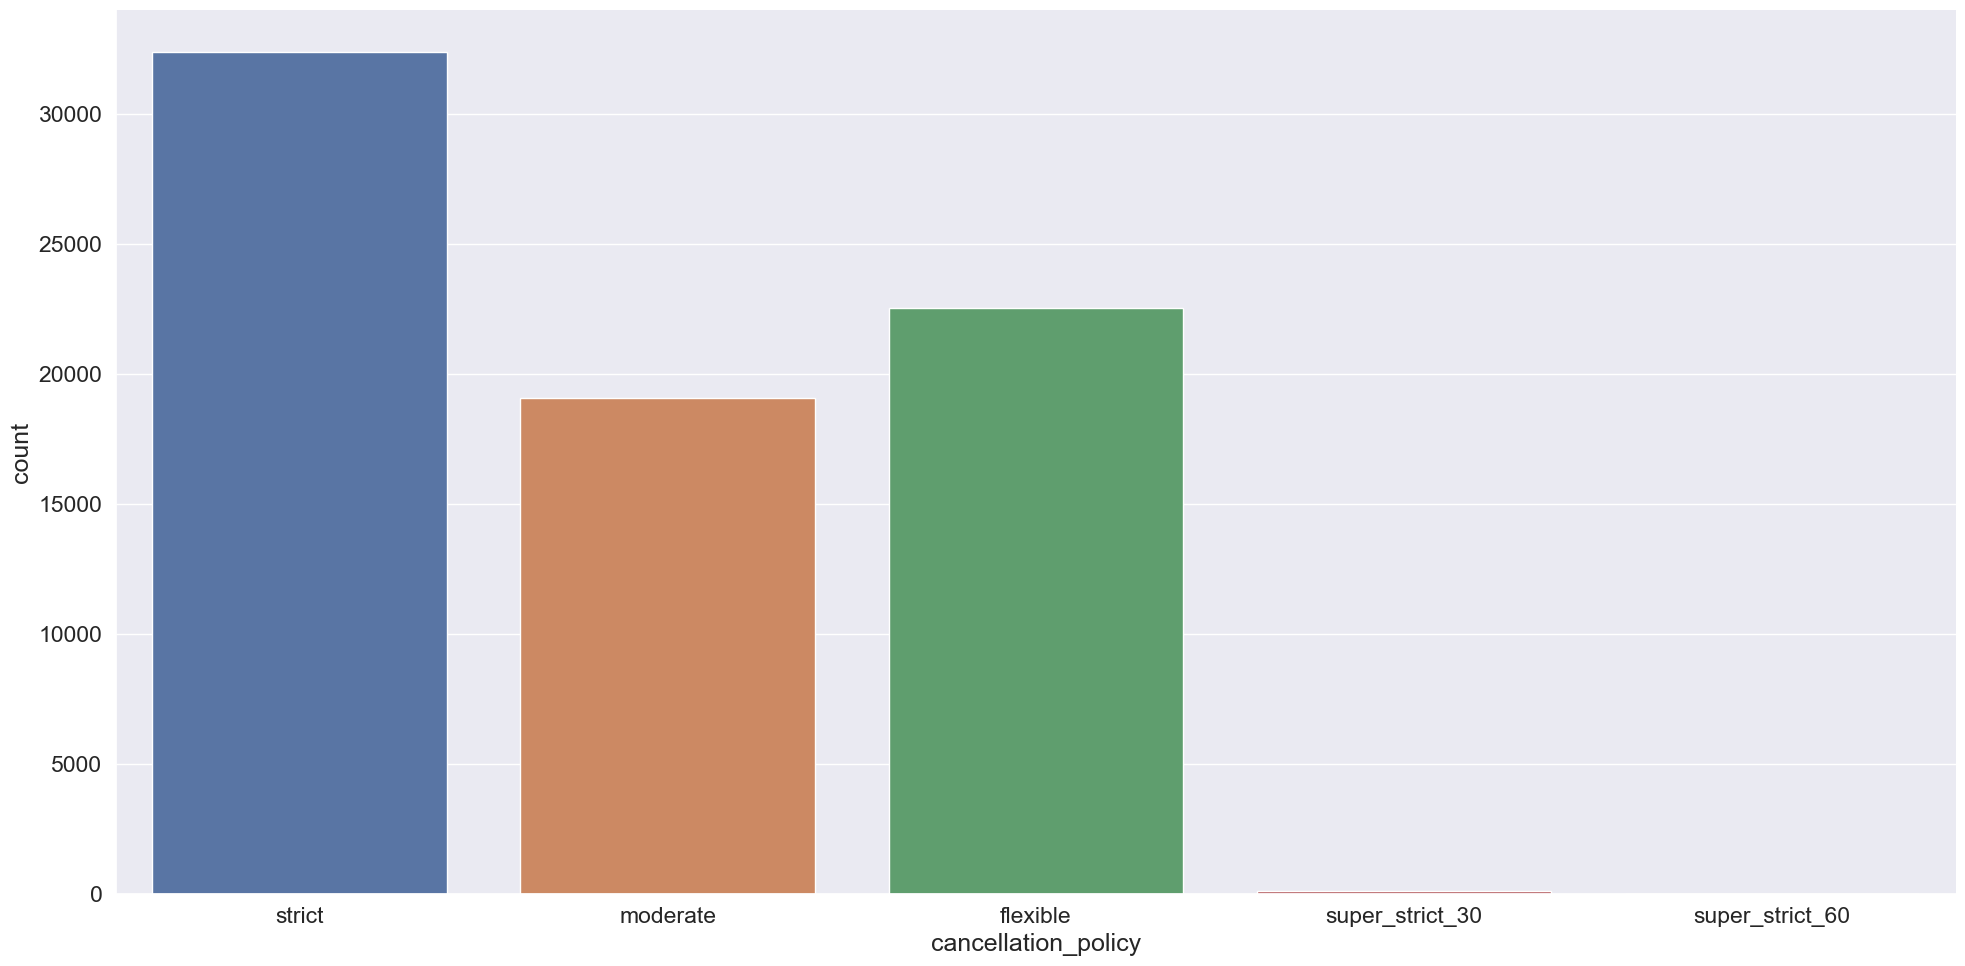

In [32]:
plot_catplot("cancellation_policy","count",10, 2)

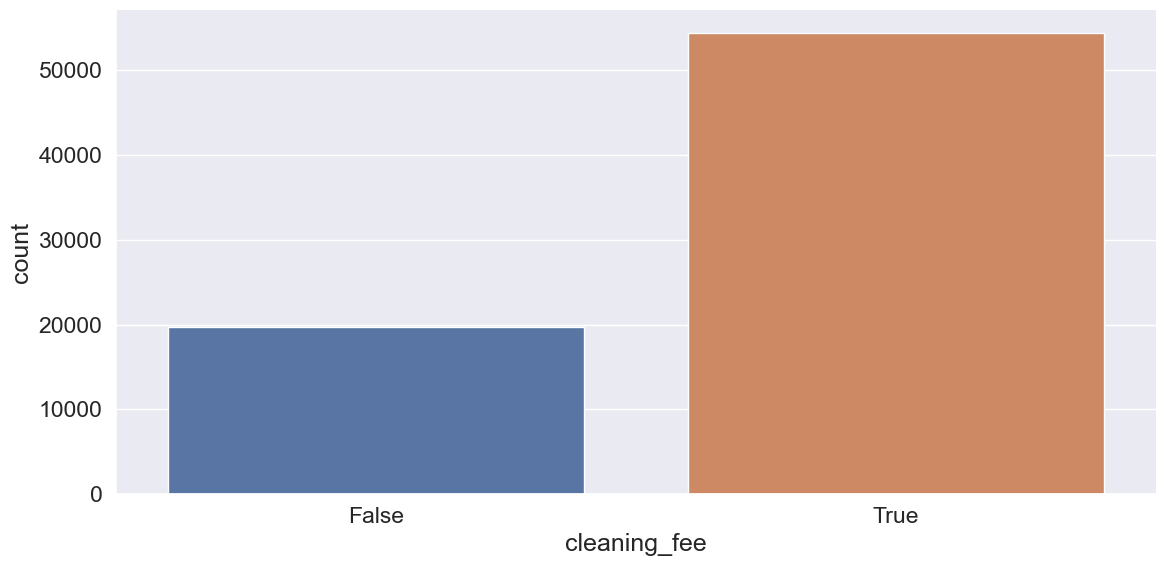

In [33]:
plot_catplot("cleaning_fee","count",6,2)

In [34]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

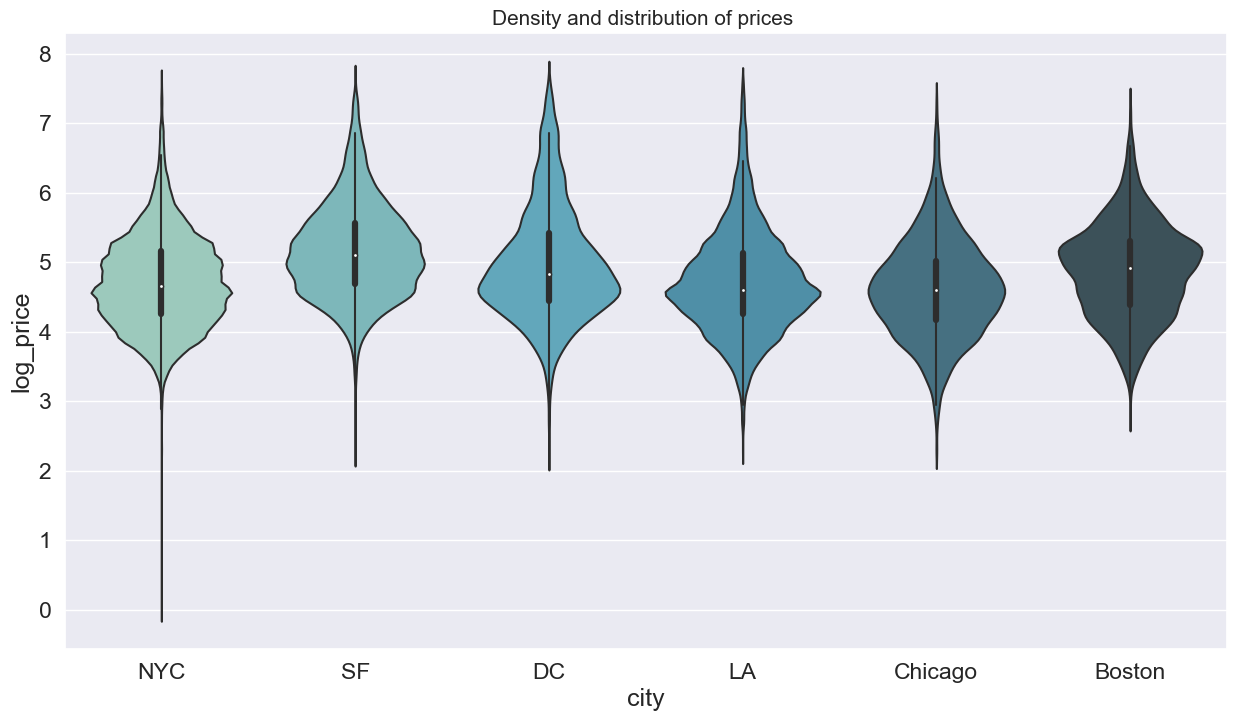

In [35]:
plot_violinplot("city","log_price")

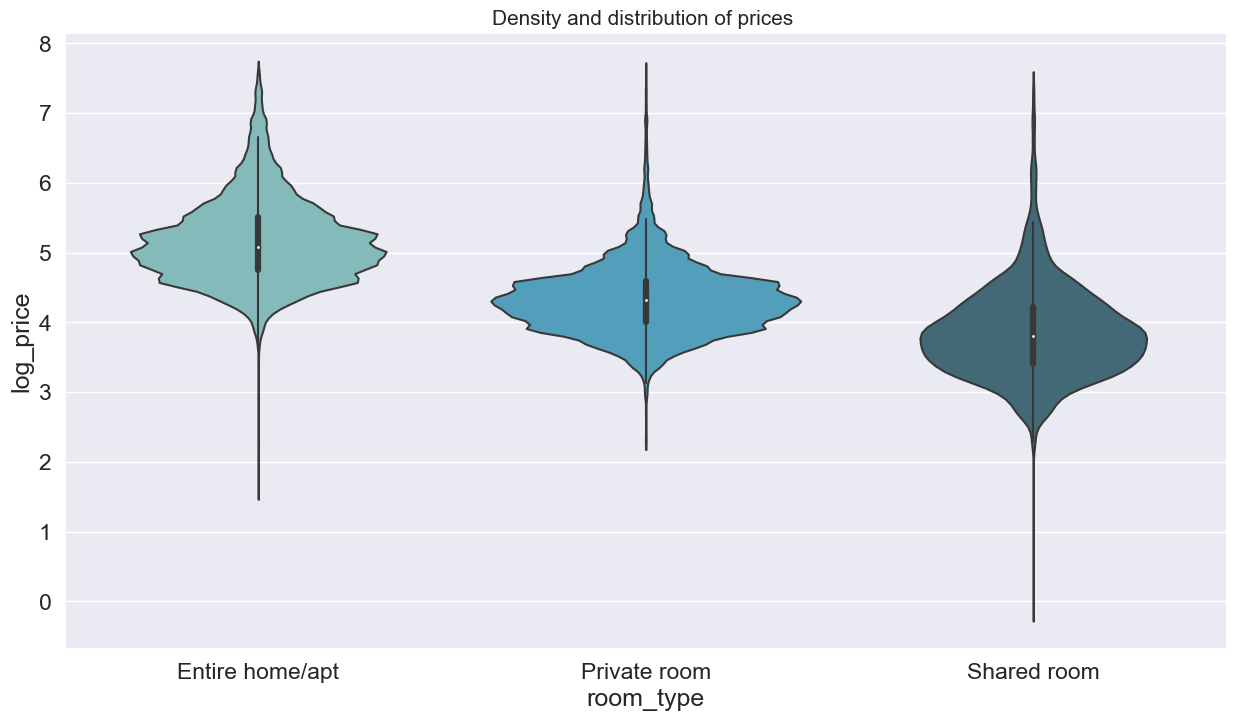

In [36]:
plot_violinplot("room_type","log_price")

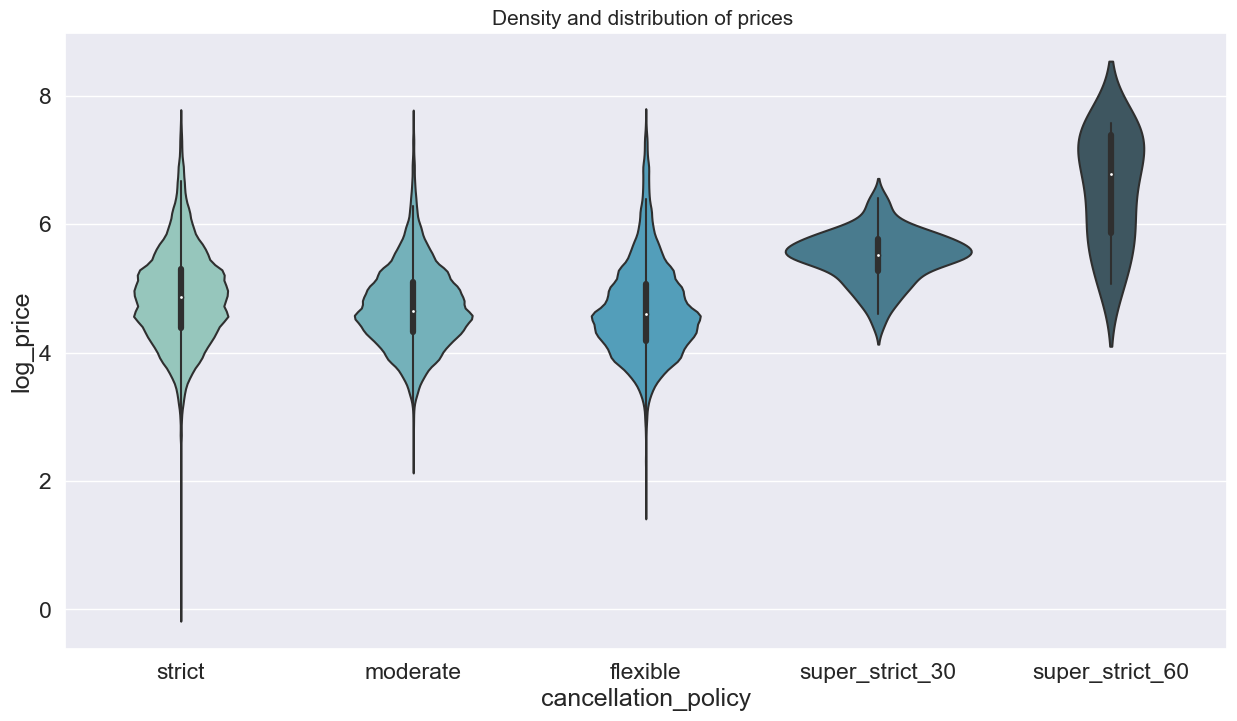

In [37]:
plot_violinplot("cancellation_policy","log_price")

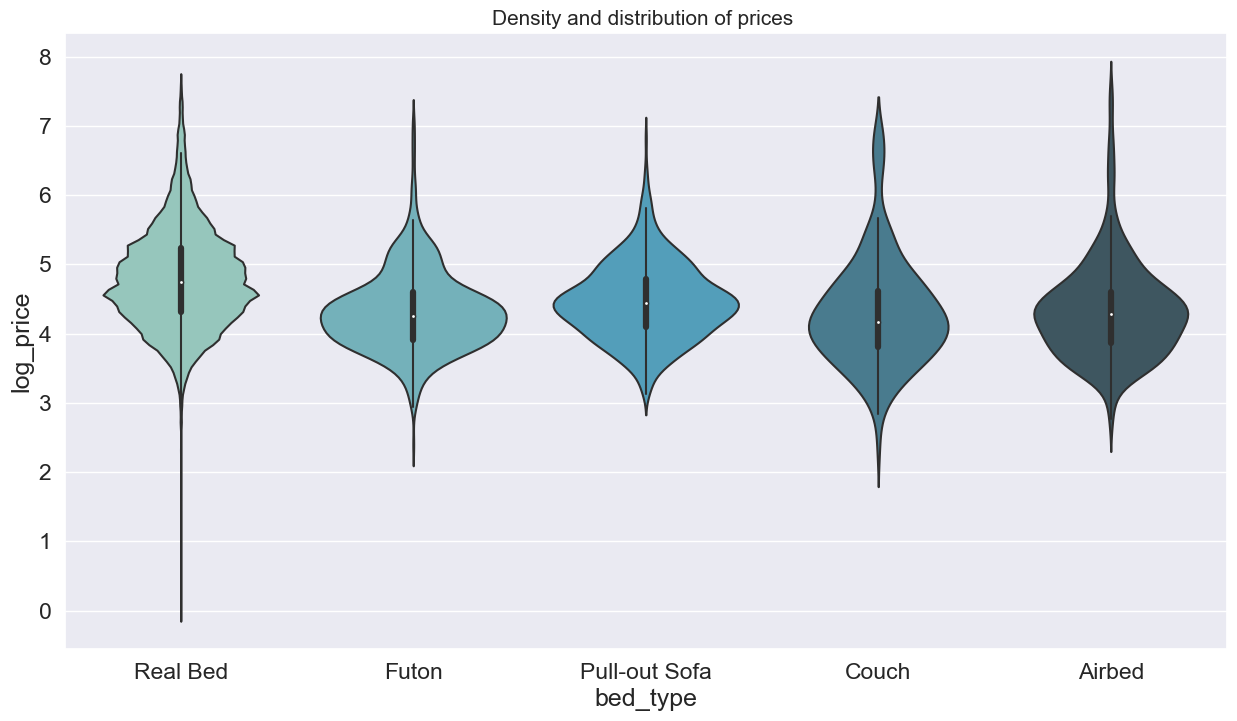

In [38]:
plot_violinplot("bed_type","log_price")

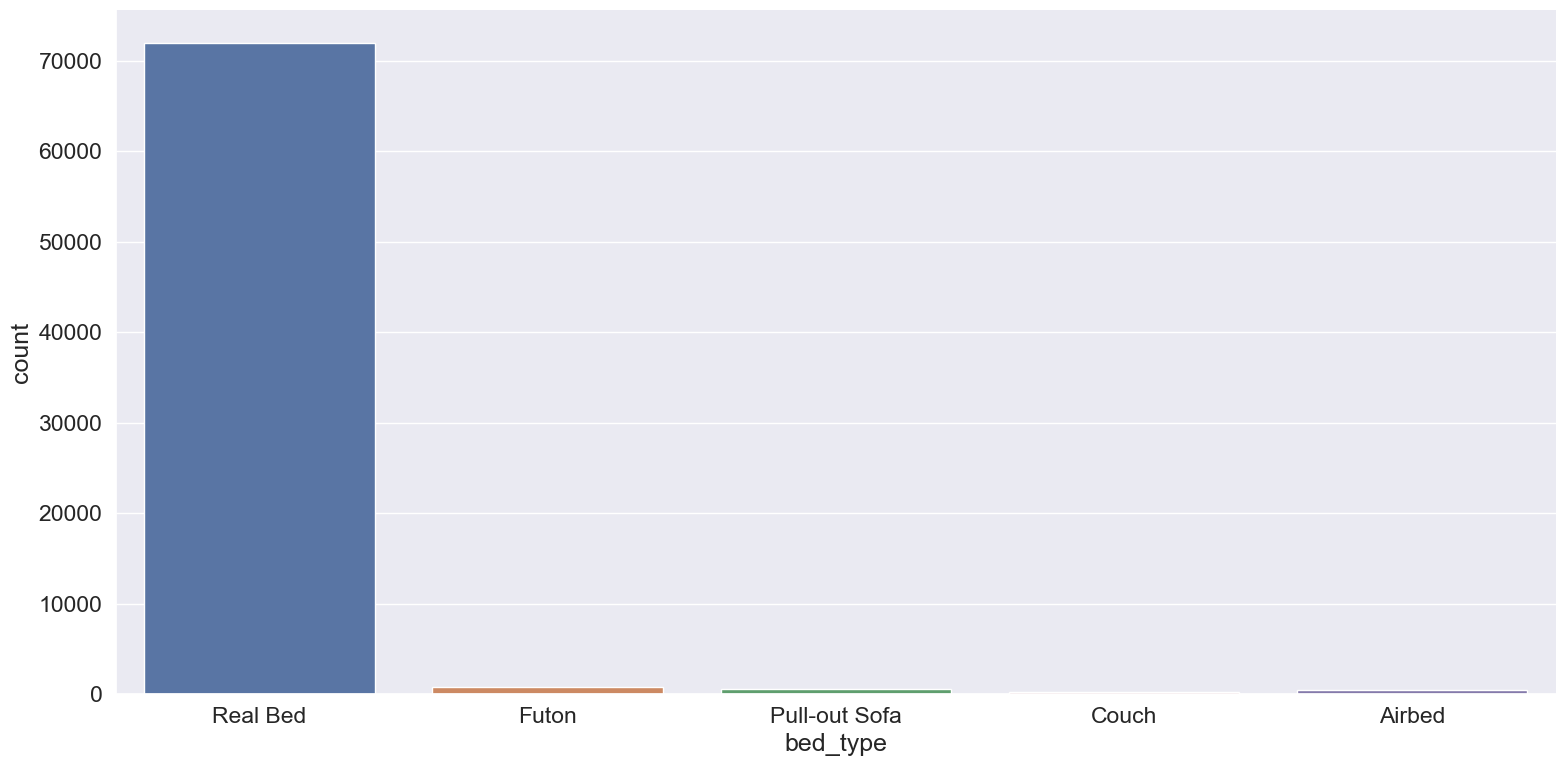

In [39]:
plot_catplot("bed_type","count",8, 2)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

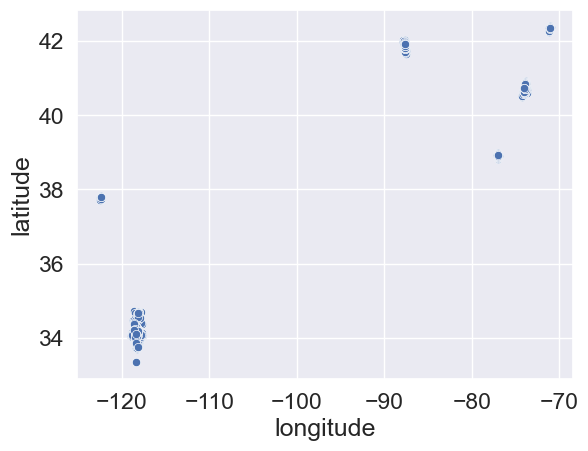

In [40]:
sns.scatterplot(df.longitude,df.latitude)

In [41]:
categorical_col = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categorical_col.append(column)

In [42]:
categorical_col

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [45]:
pd.set_option("display.max_columns",None)
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,0,0,152,3,1.0,4,2,1,4,9972,2079,1,1,80,1069,0,926,40.696524,-73.991617,10464,77,2,100.0,32398,195,1.0,1.0
1,6304928,5.129899,0,0,218,7,1.0,4,2,1,4,19019,2492,1,0,2,2980,1,1358,40.766115,-73.989040,65672,252,6,93.0,16220,74,3.0,3.0
2,7919400,4.976734,0,0,311,5,1.0,4,1,1,4,55642,2395,1,1,2,2743,1,1349,40.808110,-73.943756,66396,247,10,92.0,32852,84,1.0,3.0
3,13418779,6.620073,17,0,210,4,1.0,4,0,1,5,63089,2395,1,1,80,2188,0,1349,37.772004,-122.431619,9387,325,0,0.0,33692,748,2.0,2.0
4,3808709,4.744932,0,0,174,2,1.0,4,1,1,2,15914,1676,1,1,2,2139,1,1114,38.925627,-77.034596,32068,119,4,40.0,65883,341,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,0,1,2,1,1.0,4,0,0,4,72523,1994,1,1,80,1432,0,1142,40.709025,-73.939405,72348,605,0,0.0,25229,203,1.0,1.0
74107,13281809,5.043425,0,0,224,4,2.0,4,1,1,3,30741,2137,1,0,2,2568,0,1197,33.871549,-118.396053,59902,255,16,93.0,13695,515,2.0,4.0
74108,18688039,5.220356,0,0,402,5,1.0,4,1,1,4,4691,1547,1,1,2,988,1,1345,40.706749,-73.942377,43692,605,43,94.0,37484,203,2.0,2.0
74109,17045948,5.273000,0,0,189,2,1.0,4,2,1,4,21026,1547,1,0,2,3070,1,1345,40.738535,-74.000157,26450,592,0,0.0,51019,61,0.0,2.0


# HeatMap

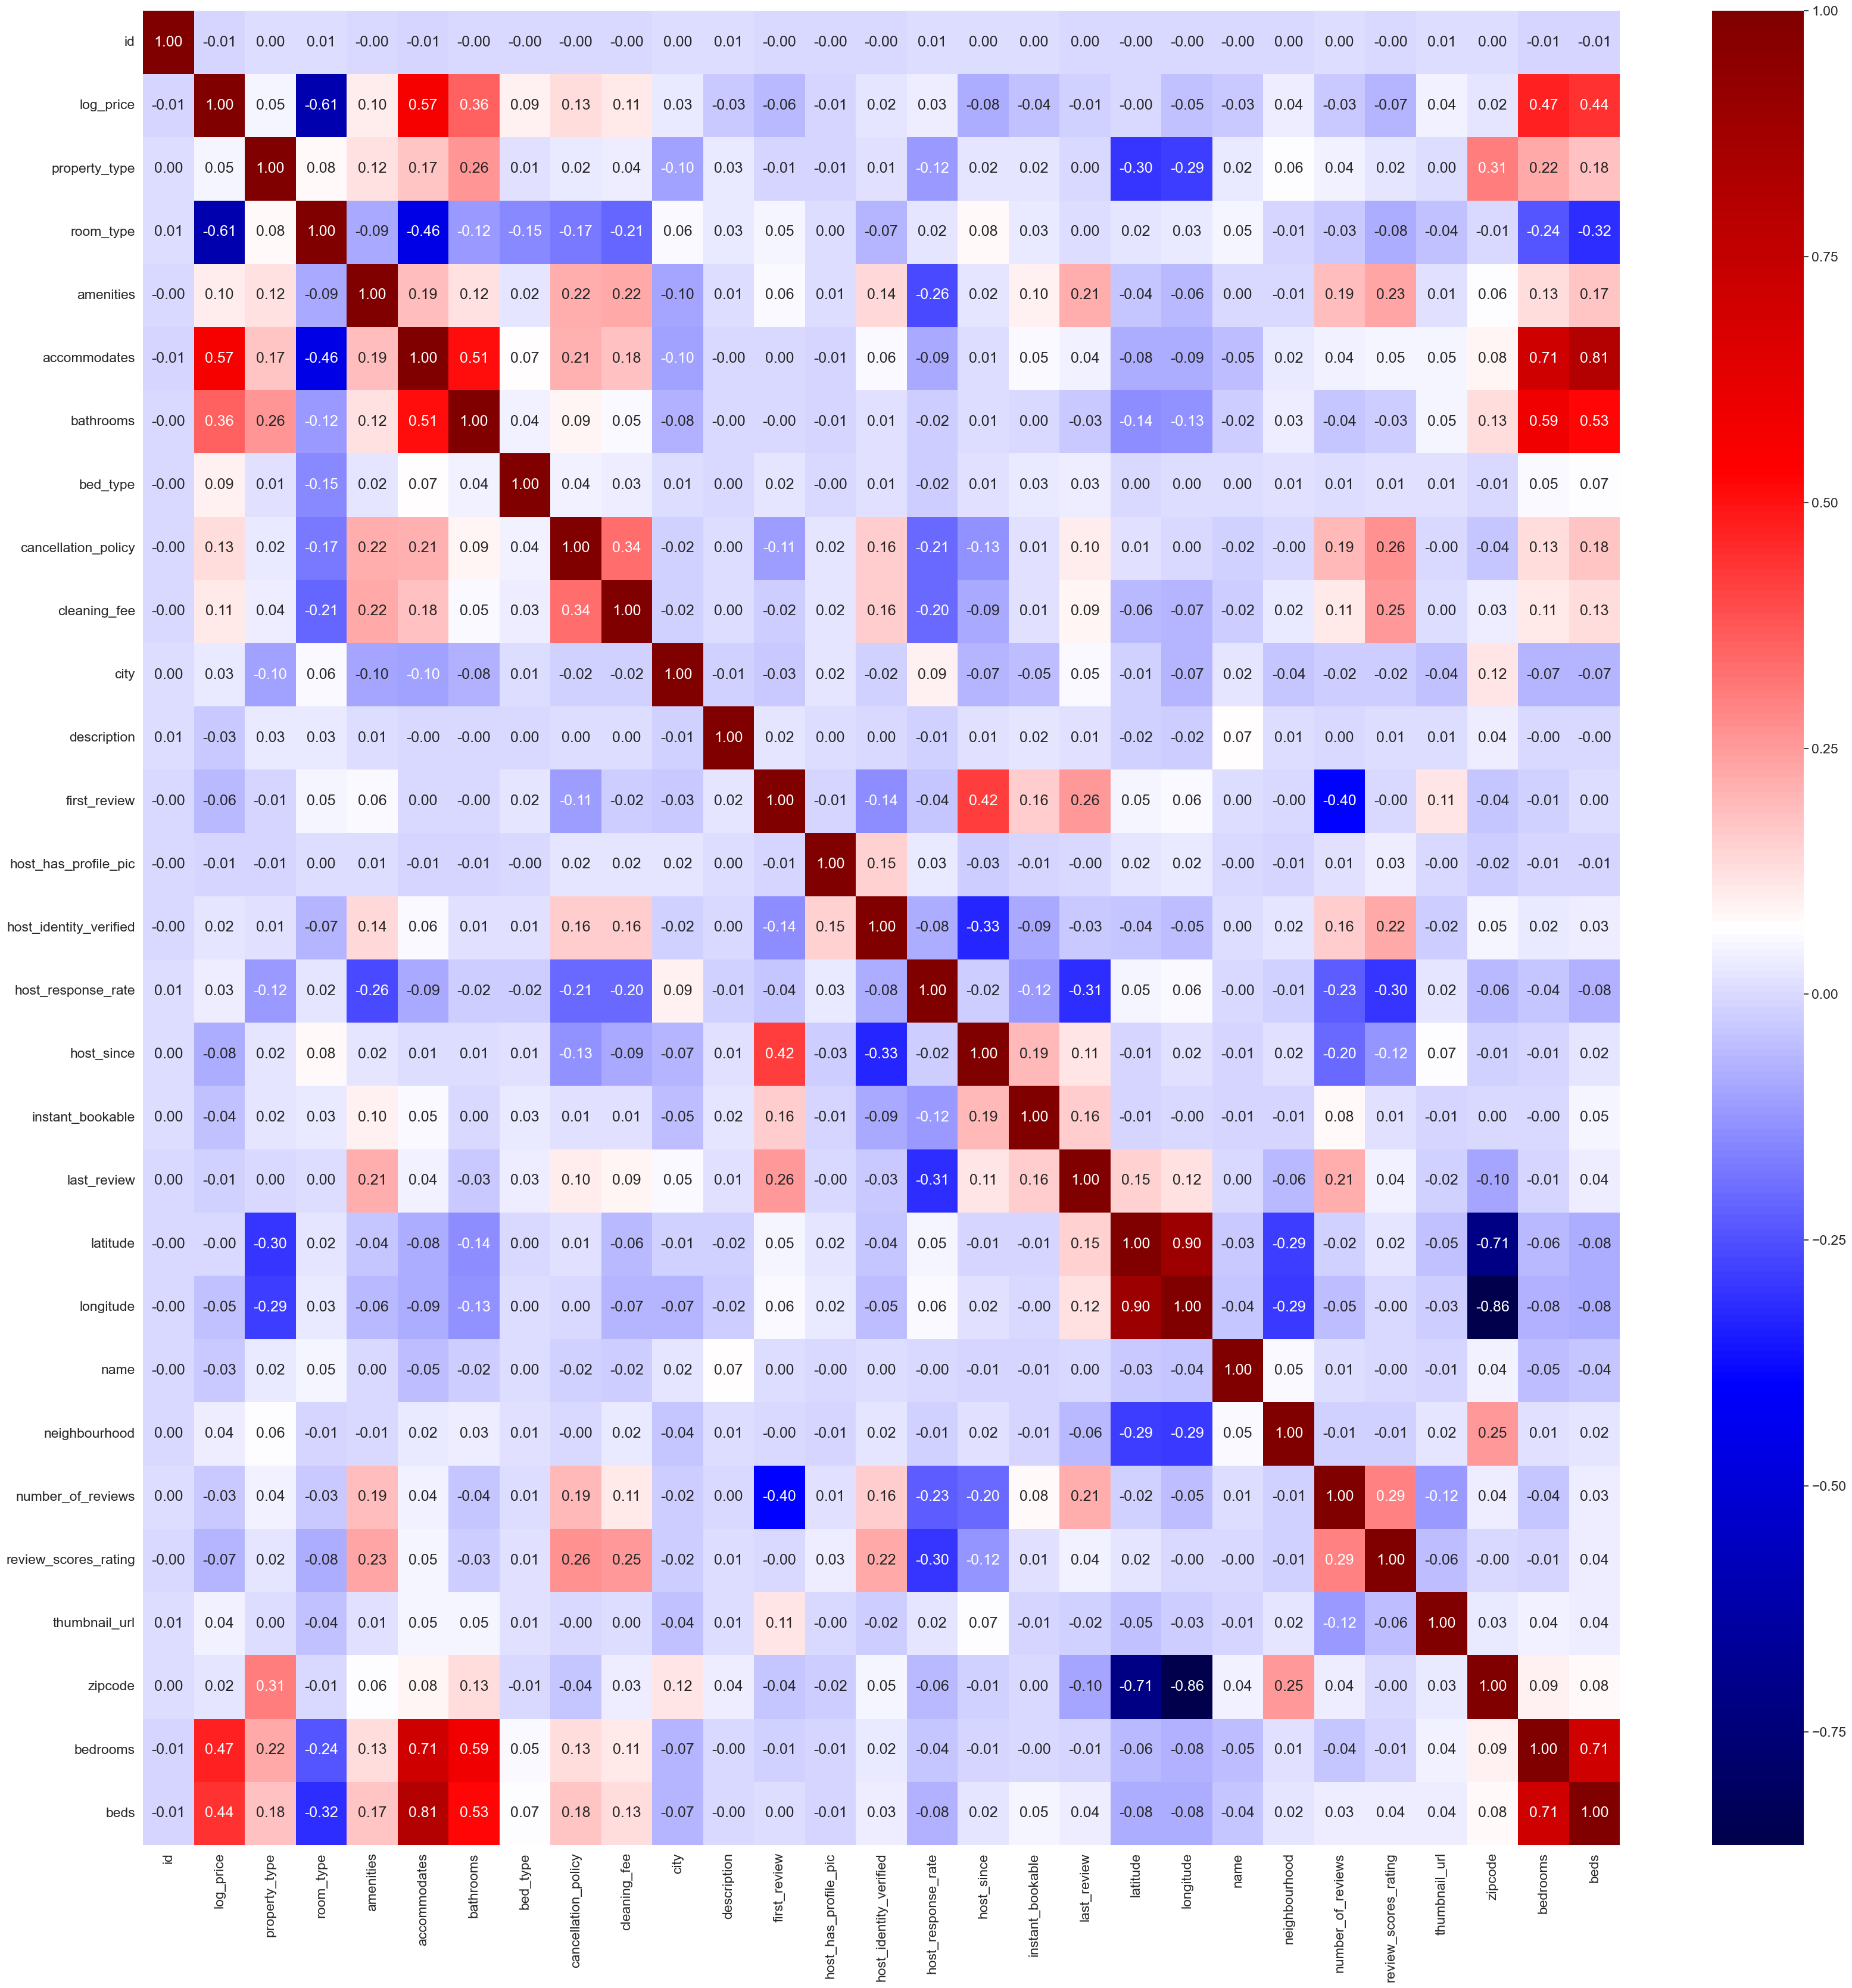

In [46]:
plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [47]:
x = df.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
            "thumbnail_url", "zipcode"],axis = 1)
y = df.log_price

In [48]:
print(x)

       property_type  room_type  amenities  accommodates  bathrooms  bed_type  \
0                  0          0        152             3        1.0         4   
1                  0          0        218             7        1.0         4   
2                  0          0        311             5        1.0         4   
3                 17          0        210             4        1.0         4   
4                  0          0        174             2        1.0         4   
...              ...        ...        ...           ...        ...       ...   
74106              0          1          2             1        1.0         4   
74107              0          0        224             4        2.0         4   
74108              0          0        402             5        1.0         4   
74109              0          0        189             2        1.0         4   
74110              2          0        279             4        1.0         4   

       cancellation_policy 

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

## Model Building

# Linear Regression

In [50]:
lr = LinearRegression(normalize=True)

In [51]:
lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

In [52]:
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.3687044424217924

Mean Squarred Error of Linear Regression     :  0.2346590396542044

Root Mean Squarred Error of Linear Regression:  0.4844161843437979

R2 Score of Linear Regression                :  0.5468814426508135


# Random Forest

In [53]:
rf = RandomForestRegressor()

In [54]:
rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

In [55]:
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.2834729895449198

Mean Squarred Error of Random Forest Regressor     :  0.1551832529123182

Root Mean Squarred Error of Random Forest Regressor:  0.39393305638435344

R2 Score of Random Forest Regressor                :  0.7003464610270185


# Polynomial Regression

In [56]:
from sklearn.linear_model import Ridge
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge(fit_intercept=True))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search with 5-fold cross-validation

poly_tuned = GridSearchCV(model, param_grid, cv=5)

In [57]:
#Traning and Testing

poly_tuned.fit(x_train, y_train)

y_pred_poly = poly_tuned.predict(x_test)

In [58]:
mae_poly  = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly  = metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))
r2_poly   = metrics.r2_score(y_test, y_pred_poly)


print('\nMean Absolute Error of Polynomial Regression     : ', mae_poly)
print('\nMean Squarred Error of Polynomial Regression     : ', mse_poly)
print('\nRoot Mean Squarred Error of Polynomial Regression: ', rmse_poly)
print('\nR2 Score of Polynomial Regression                : ', r2_poly)


Mean Absolute Error of Polynomial Regression     :  0.3423229566725932

Mean Squarred Error of Polynomial Regression     :  0.20385050510480043

Root Mean Squarred Error of Polynomial Regression:  0.4514980676645255

R2 Score of Polynomial Regression                :  0.6063716662093859


# CatBoost 

In [59]:
model_CBR = CatBoostRegressor()

In [60]:
model_CBR.fit(x_train, y_train)

cross_val_score(model_CBR, x_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=2022,
                                    ))

Learning rate set to 0.078038
0:	learn: 0.6884814	total: 156ms	remaining: 2m 35s
1:	learn: 0.6629188	total: 162ms	remaining: 1m 20s
2:	learn: 0.6397968	total: 167ms	remaining: 55.4s
3:	learn: 0.6197053	total: 172ms	remaining: 42.7s
4:	learn: 0.6022100	total: 177ms	remaining: 35.2s
5:	learn: 0.5867609	total: 182ms	remaining: 30.1s
6:	learn: 0.5716923	total: 188ms	remaining: 26.7s
7:	learn: 0.5592553	total: 194ms	remaining: 24s
8:	learn: 0.5475392	total: 200ms	remaining: 22s
9:	learn: 0.5373710	total: 207ms	remaining: 20.5s
10:	learn: 0.5274211	total: 215ms	remaining: 19.4s
11:	learn: 0.5182308	total: 222ms	remaining: 18.3s
12:	learn: 0.5107779	total: 229ms	remaining: 17.4s
13:	learn: 0.5038525	total: 236ms	remaining: 16.6s
14:	learn: 0.4975683	total: 241ms	remaining: 15.9s
15:	learn: 0.4914023	total: 248ms	remaining: 15.3s
16:	learn: 0.4865003	total: 254ms	remaining: 14.7s
17:	learn: 0.4820088	total: 259ms	remaining: 14.1s
18:	learn: 0.4773001	total: 265ms	remaining: 13.7s
19:	learn: 0.

193:	learn: 0.3910281	total: 1.18s	remaining: 4.89s
194:	learn: 0.3909055	total: 1.18s	remaining: 4.89s
195:	learn: 0.3908317	total: 1.19s	remaining: 4.88s
196:	learn: 0.3907249	total: 1.2s	remaining: 4.87s
197:	learn: 0.3906036	total: 1.2s	remaining: 4.86s
198:	learn: 0.3904990	total: 1.21s	remaining: 4.85s
199:	learn: 0.3903736	total: 1.21s	remaining: 4.84s
200:	learn: 0.3902644	total: 1.22s	remaining: 4.83s
201:	learn: 0.3901656	total: 1.22s	remaining: 4.82s
202:	learn: 0.3900325	total: 1.23s	remaining: 4.81s
203:	learn: 0.3899031	total: 1.23s	remaining: 4.8s
204:	learn: 0.3897601	total: 1.24s	remaining: 4.79s
205:	learn: 0.3896386	total: 1.24s	remaining: 4.79s
206:	learn: 0.3895612	total: 1.25s	remaining: 4.78s
207:	learn: 0.3894429	total: 1.25s	remaining: 4.77s
208:	learn: 0.3893024	total: 1.26s	remaining: 4.77s
209:	learn: 0.3892315	total: 1.26s	remaining: 4.76s
210:	learn: 0.3890933	total: 1.27s	remaining: 4.75s
211:	learn: 0.3889727	total: 1.27s	remaining: 4.74s
212:	learn: 0.3

384:	learn: 0.3767135	total: 2.18s	remaining: 3.48s
385:	learn: 0.3766620	total: 2.19s	remaining: 3.48s
386:	learn: 0.3765942	total: 2.19s	remaining: 3.47s
387:	learn: 0.3765211	total: 2.2s	remaining: 3.47s
388:	learn: 0.3764686	total: 2.2s	remaining: 3.46s
389:	learn: 0.3764213	total: 2.21s	remaining: 3.45s
390:	learn: 0.3763841	total: 2.21s	remaining: 3.45s
391:	learn: 0.3763534	total: 2.22s	remaining: 3.44s
392:	learn: 0.3762826	total: 2.22s	remaining: 3.43s
393:	learn: 0.3762213	total: 2.23s	remaining: 3.43s
394:	learn: 0.3761705	total: 2.23s	remaining: 3.42s
395:	learn: 0.3761362	total: 2.24s	remaining: 3.41s
396:	learn: 0.3761015	total: 2.24s	remaining: 3.41s
397:	learn: 0.3760325	total: 2.25s	remaining: 3.4s
398:	learn: 0.3759877	total: 2.25s	remaining: 3.39s
399:	learn: 0.3759484	total: 2.26s	remaining: 3.39s
400:	learn: 0.3759183	total: 2.26s	remaining: 3.38s
401:	learn: 0.3758792	total: 2.27s	remaining: 3.37s
402:	learn: 0.3757791	total: 2.27s	remaining: 3.37s
403:	learn: 0.3

556:	learn: 0.3692625	total: 3s	remaining: 2.38s
557:	learn: 0.3692285	total: 3s	remaining: 2.38s
558:	learn: 0.3691693	total: 3.01s	remaining: 2.38s
559:	learn: 0.3691369	total: 3.02s	remaining: 2.37s
560:	learn: 0.3690801	total: 3.02s	remaining: 2.37s
561:	learn: 0.3690432	total: 3.03s	remaining: 2.36s
562:	learn: 0.3690207	total: 3.04s	remaining: 2.36s
563:	learn: 0.3689997	total: 3.04s	remaining: 2.35s
564:	learn: 0.3689625	total: 3.05s	remaining: 2.35s
565:	learn: 0.3689038	total: 3.05s	remaining: 2.34s
566:	learn: 0.3688712	total: 3.06s	remaining: 2.34s
567:	learn: 0.3688471	total: 3.06s	remaining: 2.33s
568:	learn: 0.3688187	total: 3.07s	remaining: 2.33s
569:	learn: 0.3687706	total: 3.08s	remaining: 2.32s
570:	learn: 0.3687128	total: 3.08s	remaining: 2.31s
571:	learn: 0.3686578	total: 3.09s	remaining: 2.31s
572:	learn: 0.3686177	total: 3.09s	remaining: 2.31s
573:	learn: 0.3685785	total: 3.1s	remaining: 2.3s
574:	learn: 0.3685406	total: 3.1s	remaining: 2.29s
575:	learn: 0.3685026

744:	learn: 0.3630025	total: 4s	remaining: 1.37s
745:	learn: 0.3629705	total: 4.01s	remaining: 1.37s
746:	learn: 0.3629254	total: 4.02s	remaining: 1.36s
747:	learn: 0.3629076	total: 4.02s	remaining: 1.35s
748:	learn: 0.3628658	total: 4.03s	remaining: 1.35s
749:	learn: 0.3628461	total: 4.03s	remaining: 1.34s
750:	learn: 0.3628156	total: 4.04s	remaining: 1.34s
751:	learn: 0.3627670	total: 4.04s	remaining: 1.33s
752:	learn: 0.3627363	total: 4.05s	remaining: 1.33s
753:	learn: 0.3627152	total: 4.05s	remaining: 1.32s
754:	learn: 0.3626983	total: 4.06s	remaining: 1.32s
755:	learn: 0.3626732	total: 4.07s	remaining: 1.31s
756:	learn: 0.3626523	total: 4.07s	remaining: 1.31s
757:	learn: 0.3626260	total: 4.08s	remaining: 1.3s
758:	learn: 0.3625962	total: 4.08s	remaining: 1.29s
759:	learn: 0.3625635	total: 4.08s	remaining: 1.29s
760:	learn: 0.3625207	total: 4.09s	remaining: 1.28s
761:	learn: 0.3624828	total: 4.1s	remaining: 1.28s
762:	learn: 0.3624665	total: 4.1s	remaining: 1.27s
763:	learn: 0.3624

911:	learn: 0.3582005	total: 4.82s	remaining: 465ms
912:	learn: 0.3581631	total: 4.83s	remaining: 460ms
913:	learn: 0.3581404	total: 4.83s	remaining: 455ms
914:	learn: 0.3581038	total: 4.84s	remaining: 450ms
915:	learn: 0.3580558	total: 4.84s	remaining: 444ms
916:	learn: 0.3580408	total: 4.85s	remaining: 439ms
917:	learn: 0.3580040	total: 4.86s	remaining: 434ms
918:	learn: 0.3579701	total: 4.87s	remaining: 429ms
919:	learn: 0.3579423	total: 4.87s	remaining: 424ms
920:	learn: 0.3579195	total: 4.88s	remaining: 419ms
921:	learn: 0.3578883	total: 4.89s	remaining: 414ms
922:	learn: 0.3578786	total: 4.89s	remaining: 408ms
923:	learn: 0.3578583	total: 4.9s	remaining: 403ms
924:	learn: 0.3578313	total: 4.91s	remaining: 398ms
925:	learn: 0.3578197	total: 4.91s	remaining: 393ms
926:	learn: 0.3577718	total: 4.92s	remaining: 387ms
927:	learn: 0.3577621	total: 4.92s	remaining: 382ms
928:	learn: 0.3577349	total: 4.93s	remaining: 377ms
929:	learn: 0.3577033	total: 4.94s	remaining: 372ms
930:	learn: 0

97:	learn: 0.4095972	total: 477ms	remaining: 4.39s
98:	learn: 0.4092397	total: 482ms	remaining: 4.39s
99:	learn: 0.4090375	total: 487ms	remaining: 4.39s
100:	learn: 0.4086981	total: 493ms	remaining: 4.39s
101:	learn: 0.4084772	total: 498ms	remaining: 4.38s
102:	learn: 0.4083259	total: 502ms	remaining: 4.37s
103:	learn: 0.4081126	total: 507ms	remaining: 4.36s
104:	learn: 0.4079589	total: 511ms	remaining: 4.36s
105:	learn: 0.4076742	total: 516ms	remaining: 4.35s
106:	learn: 0.4074970	total: 521ms	remaining: 4.34s
107:	learn: 0.4072654	total: 525ms	remaining: 4.34s
108:	learn: 0.4070860	total: 529ms	remaining: 4.32s
109:	learn: 0.4069275	total: 534ms	remaining: 4.32s
110:	learn: 0.4067633	total: 538ms	remaining: 4.31s
111:	learn: 0.4065895	total: 542ms	remaining: 4.3s
112:	learn: 0.4064593	total: 546ms	remaining: 4.29s
113:	learn: 0.4062404	total: 551ms	remaining: 4.28s
114:	learn: 0.4060405	total: 555ms	remaining: 4.27s
115:	learn: 0.4057364	total: 561ms	remaining: 4.27s
116:	learn: 0.40

278:	learn: 0.3848154	total: 1.28s	remaining: 3.31s
279:	learn: 0.3847344	total: 1.29s	remaining: 3.31s
280:	learn: 0.3846971	total: 1.29s	remaining: 3.3s
281:	learn: 0.3846241	total: 1.3s	remaining: 3.3s
282:	learn: 0.3845808	total: 1.3s	remaining: 3.29s
283:	learn: 0.3844594	total: 1.3s	remaining: 3.29s
284:	learn: 0.3844185	total: 1.31s	remaining: 3.28s
285:	learn: 0.3843622	total: 1.31s	remaining: 3.27s
286:	learn: 0.3842998	total: 1.31s	remaining: 3.27s
287:	learn: 0.3842257	total: 1.32s	remaining: 3.26s
288:	learn: 0.3841773	total: 1.32s	remaining: 3.26s
289:	learn: 0.3840854	total: 1.33s	remaining: 3.25s
290:	learn: 0.3840029	total: 1.33s	remaining: 3.25s
291:	learn: 0.3839308	total: 1.34s	remaining: 3.24s
292:	learn: 0.3838720	total: 1.34s	remaining: 3.23s
293:	learn: 0.3838050	total: 1.34s	remaining: 3.23s
294:	learn: 0.3837340	total: 1.35s	remaining: 3.22s
295:	learn: 0.3836191	total: 1.35s	remaining: 3.22s
296:	learn: 0.3835583	total: 1.36s	remaining: 3.21s
297:	learn: 0.383

464:	learn: 0.3741193	total: 2.1s	remaining: 2.41s
465:	learn: 0.3740419	total: 2.1s	remaining: 2.41s
466:	learn: 0.3739889	total: 2.11s	remaining: 2.41s
467:	learn: 0.3739614	total: 2.11s	remaining: 2.4s
468:	learn: 0.3739227	total: 2.12s	remaining: 2.4s
469:	learn: 0.3738730	total: 2.12s	remaining: 2.39s
470:	learn: 0.3738329	total: 2.13s	remaining: 2.39s
471:	learn: 0.3737678	total: 2.13s	remaining: 2.39s
472:	learn: 0.3737170	total: 2.14s	remaining: 2.38s
473:	learn: 0.3736647	total: 2.14s	remaining: 2.38s
474:	learn: 0.3736198	total: 2.15s	remaining: 2.37s
475:	learn: 0.3735896	total: 2.15s	remaining: 2.37s
476:	learn: 0.3735386	total: 2.15s	remaining: 2.36s
477:	learn: 0.3735110	total: 2.16s	remaining: 2.36s
478:	learn: 0.3734562	total: 2.17s	remaining: 2.35s
479:	learn: 0.3734104	total: 2.17s	remaining: 2.35s
480:	learn: 0.3733868	total: 2.17s	remaining: 2.35s
481:	learn: 0.3733182	total: 2.18s	remaining: 2.34s
482:	learn: 0.3732990	total: 2.18s	remaining: 2.34s
483:	learn: 0.37

641:	learn: 0.3666378	total: 2.9s	remaining: 1.62s
642:	learn: 0.3666087	total: 2.91s	remaining: 1.61s
643:	learn: 0.3665662	total: 2.91s	remaining: 1.61s
644:	learn: 0.3665372	total: 2.92s	remaining: 1.6s
645:	learn: 0.3664808	total: 2.92s	remaining: 1.6s
646:	learn: 0.3664372	total: 2.92s	remaining: 1.6s
647:	learn: 0.3663953	total: 2.93s	remaining: 1.59s
648:	learn: 0.3663611	total: 2.93s	remaining: 1.59s
649:	learn: 0.3663104	total: 2.94s	remaining: 1.58s
650:	learn: 0.3662652	total: 2.94s	remaining: 1.58s
651:	learn: 0.3662253	total: 2.95s	remaining: 1.57s
652:	learn: 0.3661882	total: 2.95s	remaining: 1.57s
653:	learn: 0.3661732	total: 2.95s	remaining: 1.56s
654:	learn: 0.3661561	total: 2.96s	remaining: 1.56s
655:	learn: 0.3661345	total: 2.96s	remaining: 1.55s
656:	learn: 0.3660964	total: 2.97s	remaining: 1.55s
657:	learn: 0.3660305	total: 2.97s	remaining: 1.54s
658:	learn: 0.3659919	total: 2.97s	remaining: 1.54s
659:	learn: 0.3659678	total: 2.98s	remaining: 1.53s
660:	learn: 0.36

840:	learn: 0.3599226	total: 3.73s	remaining: 705ms
841:	learn: 0.3599094	total: 3.74s	remaining: 701ms
842:	learn: 0.3598788	total: 3.74s	remaining: 697ms
843:	learn: 0.3598347	total: 3.75s	remaining: 693ms
844:	learn: 0.3597945	total: 3.75s	remaining: 688ms
845:	learn: 0.3597555	total: 3.76s	remaining: 684ms
846:	learn: 0.3597226	total: 3.76s	remaining: 680ms
847:	learn: 0.3596760	total: 3.77s	remaining: 675ms
848:	learn: 0.3596293	total: 3.77s	remaining: 671ms
849:	learn: 0.3595910	total: 3.78s	remaining: 667ms
850:	learn: 0.3595371	total: 3.78s	remaining: 663ms
851:	learn: 0.3595135	total: 3.79s	remaining: 658ms
852:	learn: 0.3594966	total: 3.79s	remaining: 654ms
853:	learn: 0.3594683	total: 3.8s	remaining: 649ms
854:	learn: 0.3594280	total: 3.8s	remaining: 645ms
855:	learn: 0.3594105	total: 3.81s	remaining: 640ms
856:	learn: 0.3593823	total: 3.81s	remaining: 636ms
857:	learn: 0.3593438	total: 3.81s	remaining: 631ms
858:	learn: 0.3593296	total: 3.82s	remaining: 627ms
859:	learn: 0.

2:	learn: 0.6409756	total: 15.5ms	remaining: 5.15s
3:	learn: 0.6213906	total: 21.3ms	remaining: 5.31s
4:	learn: 0.6043628	total: 27ms	remaining: 5.38s
5:	learn: 0.5892576	total: 33.1ms	remaining: 5.49s
6:	learn: 0.5743557	total: 38.4ms	remaining: 5.45s
7:	learn: 0.5621800	total: 43.2ms	remaining: 5.35s
8:	learn: 0.5504533	total: 48.5ms	remaining: 5.34s
9:	learn: 0.5402180	total: 53.5ms	remaining: 5.29s
10:	learn: 0.5307123	total: 58.5ms	remaining: 5.26s
11:	learn: 0.5216215	total: 63.9ms	remaining: 5.26s
12:	learn: 0.5142198	total: 68.8ms	remaining: 5.22s
13:	learn: 0.5065022	total: 73.2ms	remaining: 5.15s
14:	learn: 0.4998432	total: 77.5ms	remaining: 5.09s
15:	learn: 0.4937780	total: 83.2ms	remaining: 5.12s
16:	learn: 0.4881382	total: 87.8ms	remaining: 5.08s
17:	learn: 0.4833670	total: 93.1ms	remaining: 5.08s
18:	learn: 0.4789017	total: 98.4ms	remaining: 5.08s
19:	learn: 0.4753113	total: 104ms	remaining: 5.08s
20:	learn: 0.4709130	total: 109ms	remaining: 5.06s
21:	learn: 0.4678691	tot

189:	learn: 0.3897617	total: 824ms	remaining: 3.51s
190:	learn: 0.3896439	total: 829ms	remaining: 3.51s
191:	learn: 0.3895409	total: 834ms	remaining: 3.51s
192:	learn: 0.3894071	total: 839ms	remaining: 3.51s
193:	learn: 0.3893109	total: 845ms	remaining: 3.51s
194:	learn: 0.3891784	total: 850ms	remaining: 3.51s
195:	learn: 0.3890630	total: 856ms	remaining: 3.51s
196:	learn: 0.3889883	total: 860ms	remaining: 3.51s
197:	learn: 0.3888743	total: 865ms	remaining: 3.5s
198:	learn: 0.3887681	total: 869ms	remaining: 3.5s
199:	learn: 0.3886793	total: 874ms	remaining: 3.49s
200:	learn: 0.3885623	total: 878ms	remaining: 3.49s
201:	learn: 0.3884197	total: 882ms	remaining: 3.48s
202:	learn: 0.3883054	total: 887ms	remaining: 3.48s
203:	learn: 0.3881873	total: 891ms	remaining: 3.48s
204:	learn: 0.3879849	total: 895ms	remaining: 3.47s
205:	learn: 0.3878883	total: 899ms	remaining: 3.47s
206:	learn: 0.3877713	total: 903ms	remaining: 3.46s
207:	learn: 0.3876772	total: 907ms	remaining: 3.46s
208:	learn: 0.

358:	learn: 0.3755095	total: 1.63s	remaining: 2.91s
359:	learn: 0.3754664	total: 1.63s	remaining: 2.91s
360:	learn: 0.3754102	total: 1.64s	remaining: 2.9s
361:	learn: 0.3753442	total: 1.65s	remaining: 2.9s
362:	learn: 0.3752797	total: 1.65s	remaining: 2.9s
363:	learn: 0.3752180	total: 1.65s	remaining: 2.89s
364:	learn: 0.3751420	total: 1.66s	remaining: 2.89s
365:	learn: 0.3750951	total: 1.66s	remaining: 2.88s
366:	learn: 0.3750216	total: 1.67s	remaining: 2.88s
367:	learn: 0.3749683	total: 1.67s	remaining: 2.87s
368:	learn: 0.3748980	total: 1.68s	remaining: 2.87s
369:	learn: 0.3748416	total: 1.68s	remaining: 2.87s
370:	learn: 0.3747959	total: 1.69s	remaining: 2.86s
371:	learn: 0.3747310	total: 1.69s	remaining: 2.86s
372:	learn: 0.3746547	total: 1.7s	remaining: 2.85s
373:	learn: 0.3745855	total: 1.7s	remaining: 2.85s
374:	learn: 0.3745527	total: 1.71s	remaining: 2.84s
375:	learn: 0.3745027	total: 1.71s	remaining: 2.84s
376:	learn: 0.3744384	total: 1.72s	remaining: 2.83s
377:	learn: 0.374

540:	learn: 0.3662559	total: 2.43s	remaining: 2.06s
541:	learn: 0.3662254	total: 2.44s	remaining: 2.06s
542:	learn: 0.3661781	total: 2.44s	remaining: 2.05s
543:	learn: 0.3661606	total: 2.44s	remaining: 2.05s
544:	learn: 0.3661370	total: 2.45s	remaining: 2.04s
545:	learn: 0.3660752	total: 2.45s	remaining: 2.04s
546:	learn: 0.3660400	total: 2.46s	remaining: 2.04s
547:	learn: 0.3659662	total: 2.46s	remaining: 2.03s
548:	learn: 0.3659014	total: 2.46s	remaining: 2.02s
549:	learn: 0.3658765	total: 2.47s	remaining: 2.02s
550:	learn: 0.3658434	total: 2.47s	remaining: 2.02s
551:	learn: 0.3658182	total: 2.48s	remaining: 2.01s
552:	learn: 0.3657583	total: 2.48s	remaining: 2s
553:	learn: 0.3656999	total: 2.48s	remaining: 2s
554:	learn: 0.3656760	total: 2.49s	remaining: 2s
555:	learn: 0.3656473	total: 2.49s	remaining: 1.99s
556:	learn: 0.3656148	total: 2.5s	remaining: 1.99s
557:	learn: 0.3655573	total: 2.5s	remaining: 1.98s
558:	learn: 0.3655388	total: 2.5s	remaining: 1.98s
559:	learn: 0.3654925	to

729:	learn: 0.3589817	total: 3.24s	remaining: 1.2s
730:	learn: 0.3589553	total: 3.25s	remaining: 1.19s
731:	learn: 0.3589310	total: 3.25s	remaining: 1.19s
732:	learn: 0.3589100	total: 3.26s	remaining: 1.19s
733:	learn: 0.3588956	total: 3.26s	remaining: 1.18s
734:	learn: 0.3588563	total: 3.27s	remaining: 1.18s
735:	learn: 0.3588251	total: 3.27s	remaining: 1.17s
736:	learn: 0.3587923	total: 3.28s	remaining: 1.17s
737:	learn: 0.3587734	total: 3.28s	remaining: 1.16s
738:	learn: 0.3587391	total: 3.29s	remaining: 1.16s
739:	learn: 0.3587044	total: 3.29s	remaining: 1.16s
740:	learn: 0.3586604	total: 3.29s	remaining: 1.15s
741:	learn: 0.3586476	total: 3.3s	remaining: 1.15s
742:	learn: 0.3586240	total: 3.3s	remaining: 1.14s
743:	learn: 0.3585777	total: 3.31s	remaining: 1.14s
744:	learn: 0.3585601	total: 3.31s	remaining: 1.13s
745:	learn: 0.3585149	total: 3.32s	remaining: 1.13s
746:	learn: 0.3584992	total: 3.32s	remaining: 1.13s
747:	learn: 0.3584766	total: 3.33s	remaining: 1.12s
748:	learn: 0.3

908:	learn: 0.3533160	total: 4.06s	remaining: 406ms
909:	learn: 0.3532823	total: 4.07s	remaining: 402ms
910:	learn: 0.3532465	total: 4.07s	remaining: 398ms
911:	learn: 0.3532241	total: 4.08s	remaining: 393ms
912:	learn: 0.3532101	total: 4.08s	remaining: 389ms
913:	learn: 0.3531831	total: 4.09s	remaining: 384ms
914:	learn: 0.3531669	total: 4.09s	remaining: 380ms
915:	learn: 0.3531438	total: 4.09s	remaining: 375ms
916:	learn: 0.3531264	total: 4.1s	remaining: 371ms
917:	learn: 0.3530971	total: 4.1s	remaining: 367ms
918:	learn: 0.3530612	total: 4.11s	remaining: 362ms
919:	learn: 0.3530424	total: 4.11s	remaining: 358ms
920:	learn: 0.3530117	total: 4.12s	remaining: 353ms
921:	learn: 0.3529795	total: 4.12s	remaining: 349ms
922:	learn: 0.3529674	total: 4.13s	remaining: 344ms
923:	learn: 0.3529409	total: 4.13s	remaining: 340ms
924:	learn: 0.3529036	total: 4.13s	remaining: 335ms
925:	learn: 0.3528690	total: 4.14s	remaining: 331ms
926:	learn: 0.3528489	total: 4.14s	remaining: 326ms
927:	learn: 0.

93:	learn: 0.4080433	total: 405ms	remaining: 3.9s
94:	learn: 0.4078725	total: 410ms	remaining: 3.9s
95:	learn: 0.4076678	total: 414ms	remaining: 3.9s
96:	learn: 0.4074433	total: 419ms	remaining: 3.9s
97:	learn: 0.4072873	total: 424ms	remaining: 3.9s
98:	learn: 0.4069482	total: 428ms	remaining: 3.9s
99:	learn: 0.4065302	total: 432ms	remaining: 3.89s
100:	learn: 0.4063163	total: 436ms	remaining: 3.88s
101:	learn: 0.4061124	total: 440ms	remaining: 3.87s
102:	learn: 0.4059570	total: 444ms	remaining: 3.87s
103:	learn: 0.4057811	total: 448ms	remaining: 3.86s
104:	learn: 0.4055614	total: 452ms	remaining: 3.85s
105:	learn: 0.4054111	total: 456ms	remaining: 3.84s
106:	learn: 0.4052597	total: 460ms	remaining: 3.84s
107:	learn: 0.4049729	total: 464ms	remaining: 3.83s
108:	learn: 0.4048470	total: 468ms	remaining: 3.82s
109:	learn: 0.4046497	total: 472ms	remaining: 3.82s
110:	learn: 0.4042658	total: 477ms	remaining: 3.82s
111:	learn: 0.4039937	total: 482ms	remaining: 3.82s
112:	learn: 0.4038773	tot

289:	learn: 0.3814201	total: 1.4s	remaining: 3.44s
290:	learn: 0.3813399	total: 1.41s	remaining: 3.43s
291:	learn: 0.3812761	total: 1.41s	remaining: 3.43s
292:	learn: 0.3812146	total: 1.42s	remaining: 3.42s
293:	learn: 0.3811003	total: 1.42s	remaining: 3.42s
294:	learn: 0.3810339	total: 1.43s	remaining: 3.42s
295:	learn: 0.3809631	total: 1.43s	remaining: 3.41s
296:	learn: 0.3808974	total: 1.44s	remaining: 3.41s
297:	learn: 0.3808434	total: 1.44s	remaining: 3.4s
298:	learn: 0.3806979	total: 1.45s	remaining: 3.4s
299:	learn: 0.3806211	total: 1.45s	remaining: 3.39s
300:	learn: 0.3805465	total: 1.46s	remaining: 3.39s
301:	learn: 0.3804977	total: 1.46s	remaining: 3.38s
302:	learn: 0.3804542	total: 1.47s	remaining: 3.38s
303:	learn: 0.3803489	total: 1.47s	remaining: 3.37s
304:	learn: 0.3802536	total: 1.48s	remaining: 3.37s
305:	learn: 0.3801720	total: 1.48s	remaining: 3.37s
306:	learn: 0.3800858	total: 1.49s	remaining: 3.36s
307:	learn: 0.3799972	total: 1.49s	remaining: 3.36s
308:	learn: 0.3

478:	learn: 0.3706512	total: 2.22s	remaining: 2.41s
479:	learn: 0.3706158	total: 2.22s	remaining: 2.41s
480:	learn: 0.3705821	total: 2.23s	remaining: 2.4s
481:	learn: 0.3705397	total: 2.23s	remaining: 2.4s
482:	learn: 0.3704716	total: 2.24s	remaining: 2.4s
483:	learn: 0.3703772	total: 2.24s	remaining: 2.39s
484:	learn: 0.3703115	total: 2.25s	remaining: 2.39s
485:	learn: 0.3702696	total: 2.25s	remaining: 2.38s
486:	learn: 0.3702267	total: 2.26s	remaining: 2.38s
487:	learn: 0.3701761	total: 2.26s	remaining: 2.37s
488:	learn: 0.3701268	total: 2.27s	remaining: 2.37s
489:	learn: 0.3700667	total: 2.27s	remaining: 2.36s
490:	learn: 0.3700104	total: 2.27s	remaining: 2.36s
491:	learn: 0.3699696	total: 2.28s	remaining: 2.35s
492:	learn: 0.3699535	total: 2.28s	remaining: 2.35s
493:	learn: 0.3699138	total: 2.29s	remaining: 2.34s
494:	learn: 0.3698676	total: 2.29s	remaining: 2.33s
495:	learn: 0.3698347	total: 2.29s	remaining: 2.33s
496:	learn: 0.3698129	total: 2.3s	remaining: 2.33s
497:	learn: 0.36

639:	learn: 0.3640158	total: 3.03s	remaining: 1.7s
640:	learn: 0.3639842	total: 3.03s	remaining: 1.7s
641:	learn: 0.3639398	total: 3.04s	remaining: 1.69s
642:	learn: 0.3639021	total: 3.04s	remaining: 1.69s
643:	learn: 0.3638224	total: 3.05s	remaining: 1.69s
644:	learn: 0.3637881	total: 3.05s	remaining: 1.68s
645:	learn: 0.3637439	total: 3.06s	remaining: 1.68s
646:	learn: 0.3637251	total: 3.07s	remaining: 1.67s
647:	learn: 0.3637048	total: 3.07s	remaining: 1.67s
648:	learn: 0.3636757	total: 3.08s	remaining: 1.67s
649:	learn: 0.3636438	total: 3.08s	remaining: 1.66s
650:	learn: 0.3636005	total: 3.09s	remaining: 1.66s
651:	learn: 0.3635823	total: 3.09s	remaining: 1.65s
652:	learn: 0.3635238	total: 3.1s	remaining: 1.65s
653:	learn: 0.3634880	total: 3.1s	remaining: 1.64s
654:	learn: 0.3634611	total: 3.11s	remaining: 1.64s
655:	learn: 0.3634456	total: 3.12s	remaining: 1.63s
656:	learn: 0.3634135	total: 3.12s	remaining: 1.63s
657:	learn: 0.3633946	total: 3.13s	remaining: 1.62s
658:	learn: 0.36

799:	learn: 0.3588204	total: 3.85s	remaining: 963ms
800:	learn: 0.3588010	total: 3.86s	remaining: 959ms
801:	learn: 0.3587727	total: 3.86s	remaining: 954ms
802:	learn: 0.3587483	total: 3.87s	remaining: 949ms
803:	learn: 0.3587221	total: 3.87s	remaining: 944ms
804:	learn: 0.3586930	total: 3.88s	remaining: 939ms
805:	learn: 0.3586713	total: 3.88s	remaining: 935ms
806:	learn: 0.3586419	total: 3.89s	remaining: 930ms
807:	learn: 0.3586034	total: 3.89s	remaining: 925ms
808:	learn: 0.3585712	total: 3.9s	remaining: 920ms
809:	learn: 0.3585459	total: 3.9s	remaining: 915ms
810:	learn: 0.3585351	total: 3.9s	remaining: 910ms
811:	learn: 0.3585009	total: 3.91s	remaining: 906ms
812:	learn: 0.3584817	total: 3.92s	remaining: 901ms
813:	learn: 0.3584641	total: 3.92s	remaining: 896ms
814:	learn: 0.3584370	total: 3.92s	remaining: 891ms
815:	learn: 0.3584245	total: 3.93s	remaining: 886ms
816:	learn: 0.3584006	total: 3.93s	remaining: 881ms
817:	learn: 0.3583772	total: 3.94s	remaining: 876ms
818:	learn: 0.3

965:	learn: 0.3537913	total: 4.68s	remaining: 165ms
966:	learn: 0.3537620	total: 4.68s	remaining: 160ms
967:	learn: 0.3537352	total: 4.69s	remaining: 155ms
968:	learn: 0.3537189	total: 4.7s	remaining: 150ms
969:	learn: 0.3536841	total: 4.7s	remaining: 145ms
970:	learn: 0.3536604	total: 4.71s	remaining: 141ms
971:	learn: 0.3536367	total: 4.71s	remaining: 136ms
972:	learn: 0.3536124	total: 4.72s	remaining: 131ms
973:	learn: 0.3535892	total: 4.73s	remaining: 126ms
974:	learn: 0.3535802	total: 4.73s	remaining: 121ms
975:	learn: 0.3535465	total: 4.74s	remaining: 116ms
976:	learn: 0.3535359	total: 4.74s	remaining: 112ms
977:	learn: 0.3535109	total: 4.75s	remaining: 107ms
978:	learn: 0.3534692	total: 4.75s	remaining: 102ms
979:	learn: 0.3534434	total: 4.76s	remaining: 97.1ms
980:	learn: 0.3534296	total: 4.76s	remaining: 92.2ms
981:	learn: 0.3533935	total: 4.77s	remaining: 87.4ms
982:	learn: 0.3533528	total: 4.77s	remaining: 82.5ms
983:	learn: 0.3533213	total: 4.78s	remaining: 77.7ms
984:	lear

159:	learn: 0.3947809	total: 817ms	remaining: 4.29s
160:	learn: 0.3946573	total: 822ms	remaining: 4.28s
161:	learn: 0.3945185	total: 827ms	remaining: 4.28s
162:	learn: 0.3942820	total: 832ms	remaining: 4.27s
163:	learn: 0.3940589	total: 838ms	remaining: 4.27s
164:	learn: 0.3939361	total: 843ms	remaining: 4.27s
165:	learn: 0.3937988	total: 847ms	remaining: 4.26s
166:	learn: 0.3936595	total: 851ms	remaining: 4.25s
167:	learn: 0.3934679	total: 856ms	remaining: 4.24s
168:	learn: 0.3932757	total: 860ms	remaining: 4.23s
169:	learn: 0.3930924	total: 865ms	remaining: 4.22s
170:	learn: 0.3929358	total: 869ms	remaining: 4.21s
171:	learn: 0.3928412	total: 873ms	remaining: 4.2s
172:	learn: 0.3927072	total: 878ms	remaining: 4.2s
173:	learn: 0.3925492	total: 882ms	remaining: 4.19s
174:	learn: 0.3924051	total: 886ms	remaining: 4.18s
175:	learn: 0.3922450	total: 891ms	remaining: 4.17s
176:	learn: 0.3919084	total: 895ms	remaining: 4.16s
177:	learn: 0.3917663	total: 899ms	remaining: 4.15s
178:	learn: 0.

318:	learn: 0.3781613	total: 1.62s	remaining: 3.46s
319:	learn: 0.3780895	total: 1.62s	remaining: 3.45s
320:	learn: 0.3780123	total: 1.63s	remaining: 3.45s
321:	learn: 0.3779667	total: 1.64s	remaining: 3.44s
322:	learn: 0.3778847	total: 1.64s	remaining: 3.44s
323:	learn: 0.3778194	total: 1.65s	remaining: 3.44s
324:	learn: 0.3777170	total: 1.65s	remaining: 3.43s
325:	learn: 0.3776620	total: 1.66s	remaining: 3.43s
326:	learn: 0.3776163	total: 1.66s	remaining: 3.42s
327:	learn: 0.3775356	total: 1.67s	remaining: 3.42s
328:	learn: 0.3774622	total: 1.67s	remaining: 3.41s
329:	learn: 0.3774336	total: 1.68s	remaining: 3.41s
330:	learn: 0.3773633	total: 1.68s	remaining: 3.4s
331:	learn: 0.3772917	total: 1.69s	remaining: 3.39s
332:	learn: 0.3772379	total: 1.69s	remaining: 3.39s
333:	learn: 0.3771622	total: 1.7s	remaining: 3.38s
334:	learn: 0.3770999	total: 1.7s	remaining: 3.38s
335:	learn: 0.3770267	total: 1.71s	remaining: 3.37s
336:	learn: 0.3769678	total: 1.71s	remaining: 3.37s
337:	learn: 0.3

481:	learn: 0.3691598	total: 2.42s	remaining: 2.6s
482:	learn: 0.3690869	total: 2.42s	remaining: 2.59s
483:	learn: 0.3690261	total: 2.43s	remaining: 2.59s
484:	learn: 0.3689422	total: 2.43s	remaining: 2.58s
485:	learn: 0.3689060	total: 2.44s	remaining: 2.58s
486:	learn: 0.3688545	total: 2.44s	remaining: 2.57s
487:	learn: 0.3687994	total: 2.45s	remaining: 2.57s
488:	learn: 0.3687692	total: 2.45s	remaining: 2.56s
489:	learn: 0.3687345	total: 2.46s	remaining: 2.56s
490:	learn: 0.3686845	total: 2.46s	remaining: 2.55s
491:	learn: 0.3686546	total: 2.47s	remaining: 2.55s
492:	learn: 0.3686012	total: 2.47s	remaining: 2.54s
493:	learn: 0.3685540	total: 2.48s	remaining: 2.54s
494:	learn: 0.3685118	total: 2.48s	remaining: 2.53s
495:	learn: 0.3684843	total: 2.48s	remaining: 2.52s
496:	learn: 0.3684554	total: 2.49s	remaining: 2.52s
497:	learn: 0.3683956	total: 2.49s	remaining: 2.51s
498:	learn: 0.3683468	total: 2.5s	remaining: 2.51s
499:	learn: 0.3682811	total: 2.5s	remaining: 2.5s
500:	learn: 0.36

670:	learn: 0.3617916	total: 3.23s	remaining: 1.58s
671:	learn: 0.3617590	total: 3.23s	remaining: 1.58s
672:	learn: 0.3617204	total: 3.24s	remaining: 1.57s
673:	learn: 0.3616793	total: 3.24s	remaining: 1.57s
674:	learn: 0.3616541	total: 3.25s	remaining: 1.56s
675:	learn: 0.3616267	total: 3.25s	remaining: 1.56s
676:	learn: 0.3616021	total: 3.26s	remaining: 1.55s
677:	learn: 0.3615807	total: 3.26s	remaining: 1.55s
678:	learn: 0.3615432	total: 3.27s	remaining: 1.54s
679:	learn: 0.3615161	total: 3.27s	remaining: 1.54s
680:	learn: 0.3614640	total: 3.27s	remaining: 1.53s
681:	learn: 0.3614244	total: 3.28s	remaining: 1.53s
682:	learn: 0.3613849	total: 3.28s	remaining: 1.52s
683:	learn: 0.3613664	total: 3.29s	remaining: 1.52s
684:	learn: 0.3613168	total: 3.29s	remaining: 1.51s
685:	learn: 0.3612778	total: 3.3s	remaining: 1.51s
686:	learn: 0.3612595	total: 3.3s	remaining: 1.5s
687:	learn: 0.3612242	total: 3.31s	remaining: 1.5s
688:	learn: 0.3611891	total: 3.31s	remaining: 1.49s
689:	learn: 0.36

832:	learn: 0.3563361	total: 4.04s	remaining: 811ms
833:	learn: 0.3562973	total: 4.05s	remaining: 806ms
834:	learn: 0.3562596	total: 4.05s	remaining: 801ms
835:	learn: 0.3562183	total: 4.06s	remaining: 797ms
836:	learn: 0.3561912	total: 4.07s	remaining: 792ms
837:	learn: 0.3561808	total: 4.07s	remaining: 787ms
838:	learn: 0.3561543	total: 4.08s	remaining: 782ms
839:	learn: 0.3561246	total: 4.08s	remaining: 778ms
840:	learn: 0.3560860	total: 4.09s	remaining: 773ms
841:	learn: 0.3560303	total: 4.09s	remaining: 769ms
842:	learn: 0.3560090	total: 4.1s	remaining: 764ms
843:	learn: 0.3559930	total: 4.11s	remaining: 759ms
844:	learn: 0.3559454	total: 4.11s	remaining: 754ms
845:	learn: 0.3559178	total: 4.12s	remaining: 749ms
846:	learn: 0.3559072	total: 4.12s	remaining: 744ms
847:	learn: 0.3558936	total: 4.13s	remaining: 740ms
848:	learn: 0.3558568	total: 4.13s	remaining: 735ms
849:	learn: 0.3558004	total: 4.14s	remaining: 730ms
850:	learn: 0.3557759	total: 4.14s	remaining: 725ms
851:	learn: 0

Learning rate set to 0.075335
0:	learn: 0.6901332	total: 4.95ms	remaining: 4.95s
1:	learn: 0.6656357	total: 9.05ms	remaining: 4.52s
2:	learn: 0.6434364	total: 13.5ms	remaining: 4.47s
3:	learn: 0.6236154	total: 17.6ms	remaining: 4.39s
4:	learn: 0.6063801	total: 22.2ms	remaining: 4.41s
5:	learn: 0.5910399	total: 26.3ms	remaining: 4.36s
6:	learn: 0.5759232	total: 30.6ms	remaining: 4.34s
7:	learn: 0.5636590	total: 34.7ms	remaining: 4.3s
8:	learn: 0.5520670	total: 39ms	remaining: 4.29s
9:	learn: 0.5415671	total: 43.3ms	remaining: 4.29s
10:	learn: 0.5322846	total: 47.8ms	remaining: 4.3s
11:	learn: 0.5229216	total: 52.3ms	remaining: 4.31s
12:	learn: 0.5155672	total: 56.6ms	remaining: 4.29s
13:	learn: 0.5079072	total: 60.9ms	remaining: 4.29s
14:	learn: 0.5009260	total: 65.4ms	remaining: 4.29s
15:	learn: 0.4944985	total: 70ms	remaining: 4.3s
16:	learn: 0.4889595	total: 74.1ms	remaining: 4.29s
17:	learn: 0.4847357	total: 78.3ms	remaining: 4.27s
18:	learn: 0.4804818	total: 82.5ms	remaining: 4.26s

174:	learn: 0.3934942	total: 813ms	remaining: 3.83s
175:	learn: 0.3933432	total: 818ms	remaining: 3.83s
176:	learn: 0.3932282	total: 824ms	remaining: 3.83s
177:	learn: 0.3930857	total: 829ms	remaining: 3.83s
178:	learn: 0.3929591	total: 835ms	remaining: 3.83s
179:	learn: 0.3928277	total: 840ms	remaining: 3.83s
180:	learn: 0.3926274	total: 845ms	remaining: 3.82s
181:	learn: 0.3924832	total: 850ms	remaining: 3.82s
182:	learn: 0.3924034	total: 855ms	remaining: 3.81s
183:	learn: 0.3922788	total: 859ms	remaining: 3.81s
184:	learn: 0.3921214	total: 863ms	remaining: 3.8s
185:	learn: 0.3919574	total: 869ms	remaining: 3.8s
186:	learn: 0.3918767	total: 873ms	remaining: 3.79s
187:	learn: 0.3917476	total: 879ms	remaining: 3.79s
188:	learn: 0.3916218	total: 884ms	remaining: 3.79s
189:	learn: 0.3915048	total: 890ms	remaining: 3.79s
190:	learn: 0.3913730	total: 895ms	remaining: 3.79s
191:	learn: 0.3912558	total: 900ms	remaining: 3.79s
192:	learn: 0.3911619	total: 905ms	remaining: 3.78s
193:	learn: 0.

339:	learn: 0.3783575	total: 1.61s	remaining: 3.13s
340:	learn: 0.3783169	total: 1.62s	remaining: 3.13s
341:	learn: 0.3782608	total: 1.62s	remaining: 3.12s
342:	learn: 0.3781663	total: 1.63s	remaining: 3.12s
343:	learn: 0.3781108	total: 1.63s	remaining: 3.11s
344:	learn: 0.3780802	total: 1.64s	remaining: 3.11s
345:	learn: 0.3780383	total: 1.64s	remaining: 3.1s
346:	learn: 0.3779579	total: 1.64s	remaining: 3.1s
347:	learn: 0.3779195	total: 1.65s	remaining: 3.09s
348:	learn: 0.3778377	total: 1.65s	remaining: 3.08s
349:	learn: 0.3777755	total: 1.66s	remaining: 3.08s
350:	learn: 0.3777005	total: 1.66s	remaining: 3.07s
351:	learn: 0.3776525	total: 1.67s	remaining: 3.07s
352:	learn: 0.3775854	total: 1.67s	remaining: 3.06s
353:	learn: 0.3775311	total: 1.67s	remaining: 3.06s
354:	learn: 0.3774707	total: 1.68s	remaining: 3.05s
355:	learn: 0.3774056	total: 1.68s	remaining: 3.04s
356:	learn: 0.3773674	total: 1.69s	remaining: 3.04s
357:	learn: 0.3773120	total: 1.69s	remaining: 3.03s
358:	learn: 0.

527:	learn: 0.3688845	total: 2.43s	remaining: 2.17s
528:	learn: 0.3688363	total: 2.44s	remaining: 2.17s
529:	learn: 0.3688041	total: 2.44s	remaining: 2.17s
530:	learn: 0.3687532	total: 2.45s	remaining: 2.16s
531:	learn: 0.3687148	total: 2.45s	remaining: 2.16s
532:	learn: 0.3686902	total: 2.46s	remaining: 2.15s
533:	learn: 0.3686598	total: 2.46s	remaining: 2.15s
534:	learn: 0.3686446	total: 2.47s	remaining: 2.14s
535:	learn: 0.3685956	total: 2.47s	remaining: 2.14s
536:	learn: 0.3685400	total: 2.48s	remaining: 2.13s
537:	learn: 0.3684867	total: 2.48s	remaining: 2.13s
538:	learn: 0.3684692	total: 2.48s	remaining: 2.12s
539:	learn: 0.3684391	total: 2.49s	remaining: 2.12s
540:	learn: 0.3684104	total: 2.49s	remaining: 2.12s
541:	learn: 0.3683666	total: 2.5s	remaining: 2.11s
542:	learn: 0.3683246	total: 2.5s	remaining: 2.11s
543:	learn: 0.3682649	total: 2.51s	remaining: 2.1s
544:	learn: 0.3682186	total: 2.52s	remaining: 2.1s
545:	learn: 0.3681873	total: 2.52s	remaining: 2.1s
546:	learn: 0.368

695:	learn: 0.3624996	total: 3.24s	remaining: 1.42s
696:	learn: 0.3624669	total: 3.25s	remaining: 1.41s
697:	learn: 0.3624451	total: 3.25s	remaining: 1.41s
698:	learn: 0.3624176	total: 3.26s	remaining: 1.4s
699:	learn: 0.3623840	total: 3.27s	remaining: 1.4s
700:	learn: 0.3623161	total: 3.27s	remaining: 1.4s
701:	learn: 0.3623109	total: 3.28s	remaining: 1.39s
702:	learn: 0.3622806	total: 3.28s	remaining: 1.39s
703:	learn: 0.3622527	total: 3.29s	remaining: 1.38s
704:	learn: 0.3622190	total: 3.29s	remaining: 1.38s
705:	learn: 0.3621722	total: 3.3s	remaining: 1.37s
706:	learn: 0.3621226	total: 3.3s	remaining: 1.37s
707:	learn: 0.3620699	total: 3.31s	remaining: 1.36s
708:	learn: 0.3620244	total: 3.31s	remaining: 1.36s
709:	learn: 0.3619898	total: 3.32s	remaining: 1.35s
710:	learn: 0.3619721	total: 3.32s	remaining: 1.35s
711:	learn: 0.3619465	total: 3.33s	remaining: 1.35s
712:	learn: 0.3619210	total: 3.33s	remaining: 1.34s
713:	learn: 0.3618711	total: 3.34s	remaining: 1.34s
714:	learn: 0.361

874:	learn: 0.3566884	total: 4.07s	remaining: 582ms
875:	learn: 0.3566574	total: 4.08s	remaining: 577ms
876:	learn: 0.3566367	total: 4.08s	remaining: 573ms
877:	learn: 0.3565913	total: 4.09s	remaining: 568ms
878:	learn: 0.3565518	total: 4.09s	remaining: 564ms
879:	learn: 0.3565384	total: 4.1s	remaining: 559ms
880:	learn: 0.3565289	total: 4.1s	remaining: 554ms
881:	learn: 0.3565024	total: 4.11s	remaining: 549ms
882:	learn: 0.3564875	total: 4.11s	remaining: 545ms
883:	learn: 0.3564785	total: 4.12s	remaining: 540ms
884:	learn: 0.3564626	total: 4.12s	remaining: 535ms
885:	learn: 0.3564141	total: 4.12s	remaining: 531ms
886:	learn: 0.3563982	total: 4.13s	remaining: 526ms
887:	learn: 0.3563764	total: 4.13s	remaining: 521ms
888:	learn: 0.3563654	total: 4.13s	remaining: 516ms
889:	learn: 0.3563350	total: 4.14s	remaining: 512ms
890:	learn: 0.3563082	total: 4.14s	remaining: 507ms
891:	learn: 0.3562807	total: 4.15s	remaining: 502ms
892:	learn: 0.3562478	total: 4.15s	remaining: 497ms
893:	learn: 0.

array([0.72147017, 0.71221046, 0.71449863, 0.70200787, 0.71357205])

In [61]:
y_pred_cbr = model_CBR.predict(x_test)

In [62]:
mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)


print('\nMean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('\nR2 Score of CatBoost Regressor                : ', r2_cbr)


Mean Absolute Error of CatBoost Regressor     :  0.2769374040423291

Mean Squarred Error of CatBoost Regressor     :  0.14482482684900497

Root Mean Squarred Error of CatBoost Regressor:  0.38055857216597416

R2 Score of CatBoost Regressor                :  0.7203482264869523


# Gradient Boosting

In [63]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [64]:
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

In [65]:
mae_gb  = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb  = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb   = metrics.r2_score(y_test, y_pred_gb)


print('\nMean Absolute Error of Gradient Boosting     : ', mae_gb)
print('\nMean Squarred Error of Gradient Boosting     : ', mse_gb)
print('\nRoot Mean Squarred Error of Gradient Boosting: ', rmse_gb)
print('\nR2 Score of Gradient Boosting                : ', r2_gb)


Mean Absolute Error of Gradient Boosting     :  0.3052618399619076

Mean Squarred Error of Gradient Boosting     :  0.17018747706259144

Root Mean Squarred Error of Gradient Boosting:  0.41253784924851616

R2 Score of Gradient Boosting                :  0.6713738188005173


# XGBoost

In [66]:
xgb = XGBRegressor(objective='reg:squarederror')

In [67]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [68]:
y_pred_xgb = xgb.predict(x_test)

In [69]:
mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.2810702305263807

Mean Squarred Error of XGBoost Regressor     :  0.14938728895874256

Root Mean Squarred Error of XGBoost Regressor:  0.38650651864974095

R2 Score of XGBoost Regressor                :  0.711538268634184


In [70]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,
          "Polynomial Regression": r2_poly,
          "CatBoost": r2_cbr,
          "Gradient Boosting":r2_gb ,
          "XGBoost": r2_xgb}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "Polynomial Regression": mae_poly,
          "CatBoost": mae_cbr,
          "Gradient Boosting":mae_gb ,
          "XGBoost": mae_xgb}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf ,
          "Polynomial Regression": mse_poly,
          "CatBoost": mse_cbr,
          "Gradient Boosting":mse_gb ,
          "XGBoost": mse_xgb}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf ,
          "Polynomial Regression": rmse_poly,
          "CatBoost": rmse_cbr,
          "Gradient Boosting":rmse_gb ,
          "XGBoost": rmse_xgb}


In [71]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [72]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.546881,0.368704,0.234659,0.484416
Random Forest,0.700346,0.283473,0.155183,0.393933
Polynomial Regression,0.606372,0.342323,0.203851,0.451498
CatBoost,0.720348,0.276937,0.144825,0.380559
Gradient Boosting,0.671374,0.305262,0.170187,0.412538
XGBoost,0.711538,0.281070,0.149387,0.386507


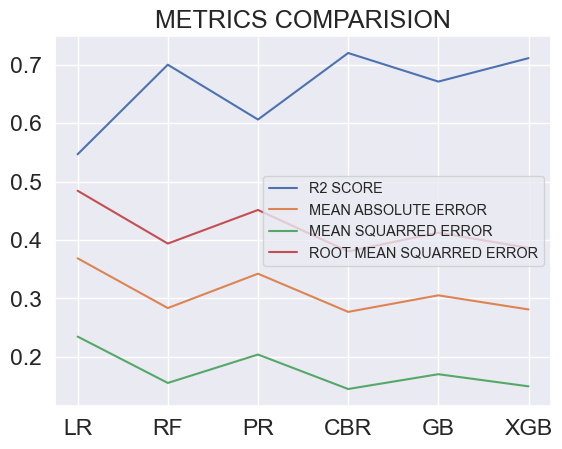

In [73]:
alg = ['LR','RF','PR','CBR','GB','XGB']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()

In [74]:
import pickle
pickle.dump(model_CBR, open("catboostalgo.pkl", "wb"))